In [2]:
import re
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/fpolygon/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/fpolygon/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [3]:
# Define the preprocess_text function
def preprocess_text(text):
    # Remove HTML tags and special characters
    text = re.sub(r'<.*?>', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    
    # Tokenize the text
    tokens = word_tokenize(text)
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word.lower() not in stop_words and word.isalnum()]
    
    # Lemmatize the tokens
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]
    
    # Join the tokens back together
    preprocessed_text = ' '.join(lemmatized_tokens)
    return preprocessed_text


In [4]:
# Preprocess the IMDB Dataset
df = pd.read_csv("/Users/fpolygon/Documents/Sentiment Analysis of Movie Reviews/data/raw/IMDB Dataset.csv")
print("Original DataFrame: ")
print(df.head())

# Apply preprocessing to the entire DataFrame
df['preprocessed_review'] = df['review'].apply(preprocess_text)

# Convert sentiment labels to 1 (positive) and 0 (negative)
df['sentiment'] = df['sentiment'].map({'positive': 1, 'negative': 0})

print("\nPreprocessed DataFrame: ")
print(df.head())

# Save the preprocessed data
df.to_csv("/Users/fpolygon/Documents/Sentiment Analysis of Movie Reviews/data/exploratory/IMDB Dataset Preprocessed Exploratory.csv", index=False)

print("\nPreprocessing complete. Data saved to 'data/processed/IMDB Dataset Preprocessed Exploratory.csv'")

Original DataFrame: 
                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive

Preprocessed DataFrame: 
                                              review  sentiment  \
0  One of the other reviewers has mentioned that ...          1   
1  A wonderful little production. <br /><br />The...          1   
2  I thought this was a wonderful way to spend ti...          1   
3  Basically there's a family where a little boy ...          0   
4  Petter Mattei's "Love in the Time of Money" is...          1   

                                 preprocessed_review  
0  One reviewer mentioned watching 1 Oz episode y...  
1  wonderful little production filming technique ...  
2  thou

# Bag-of-Words

In [5]:
# Bag of Words
from sklearn.feature_extraction.text import CountVectorizer

df = pd.read_csv("/Users/fpolygon/Documents/Sentiment Analysis of Movie Reviews/data/exploratory/IMDB Dataset Preprocessed Exploratory.csv")

# Get the sentiment labels from the preprocessed DataFrame
vectorizer = CountVectorizer()

# Fit and transform the preprocessed reviews
bow_features = vectorizer.fit_transform(df['preprocessed_review'])

## Pre Optimization

### Naive Bayes

In [5]:
import logging
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Set up logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

# Bag of Words
logging.info("Starting Bag of Words Naive Bayes classification")

# Fit and transform the preprocessed reviews
logging.info("Fitting and transforming preprocessed reviews using CountVectorizer")
vectorizer = CountVectorizer()
bow_features = vectorizer.fit_transform(df['preprocessed_review'])
logging.info(f"Shape of BoW features: {bow_features.shape}")

# Get the sentiment labels from the preprocessed DataFrame
logging.info("Extracting sentiment labels")
labels = df['sentiment']
logging.info(f"Number of labels: {len(labels)}")

# Split the data into training and testing sets
logging.info("Splitting data into training and testing sets")
X_train, X_test, y_train, y_test = train_test_split(bow_features, labels, test_size=0.2, random_state=42)
logging.info(f"Training set shape: {X_train.shape}, Testing set shape: {X_test.shape}")

# Create and train the Naive Bayes model
logging.info("Creating and training the Naive Bayes model")
model = MultinomialNB()
model.fit(X_train, y_train)
logging.info("Model training completed")

# Make predictions on the testing set
logging.info("Making predictions on the testing set")
y_pred = model.predict(X_test)
logging.info("Predictions completed")

# Evaluate the model's performance
logging.info("Evaluating model performance")
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')  # Using weighted average for multi-class
recall = recall_score(y_test, y_pred, average='weighted')  # Using weighted average for multi-class
f1 = f1_score(y_test, y_pred, average='weighted')  # Using weighted average for multi-class

logging.info("BoW Naive Bayes Model Performance:")
logging.info(f"Accuracy: {accuracy:.4f}")
logging.info(f"Precision: {precision:.4f}")
logging.info(f"Recall: {recall:.4f}")
logging.info(f"F1 Score: {f1:.4f}")

print("BoW Naive Bayes Model Performance:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

logging.info("Bag of Words Naive Bayes classification completed")

2024-08-20 00:36:08,009 - INFO - Starting Bag of Words Naive Bayes classification
2024-08-20 00:36:08,009 - INFO - Fitting and transforming preprocessed reviews using CountVectorizer
2024-08-20 00:36:10,875 - INFO - Shape of BoW features: (50000, 216000)
2024-08-20 00:36:10,875 - INFO - Extracting sentiment labels
2024-08-20 00:36:10,876 - INFO - Number of labels: 50000
2024-08-20 00:36:10,876 - INFO - Splitting data into training and testing sets
2024-08-20 00:36:10,893 - INFO - Training set shape: (40000, 216000), Testing set shape: (10000, 216000)
2024-08-20 00:36:10,894 - INFO - Creating and training the Naive Bayes model
2024-08-20 00:36:10,909 - INFO - Model training completed
2024-08-20 00:36:10,909 - INFO - Making predictions on the testing set
2024-08-20 00:36:10,916 - INFO - Predictions completed
2024-08-20 00:36:10,916 - INFO - Evaluating model performance
2024-08-20 00:36:10,925 - INFO - BoW Naive Bayes Model Performance:
2024-08-20 00:36:10,926 - INFO - Accuracy: 0.8612
20

BoW Naive Bayes Model Performance:
Accuracy: 0.8612
Precision: 0.8615
Recall: 0.8612
F1 Score: 0.8612


### Logistic Regression

In [6]:
import logging
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Set up logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

logging.info("Starting Bag of Words Logistic Regression classification")

# Get the sentiment labels from the preprocessed DataFrame
logging.info("Extracting sentiment labels")
labels = df['sentiment']
logging.info(f"Number of labels: {len(labels)}")

# Split the data into training and testing sets
logging.info("Splitting data into training and testing sets")
X_train, X_test, y_train, y_test = train_test_split(bow_features, labels, test_size=0.2, random_state=42)
logging.info(f"Training set shape: {X_train.shape}, Testing set shape: {X_test.shape}")

# Create and train the logistic regression model
logging.info("Creating and training the Logistic Regression model")
model = LogisticRegression(max_iter=2000)  # Increase max_iter to allow more iterations
logging.info(f"Logistic Regression parameters: {model.get_params()}")
model.fit(X_train, y_train)
logging.info("Model training completed")

# Make predictions on the testing set
logging.info("Making predictions on the testing set")
y_pred = model.predict(X_test)
logging.info("Predictions completed")

# Evaluate the model's performance
logging.info("Evaluating model performance")
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')  # Using weighted average for multi-class
recall = recall_score(y_test, y_pred, average='weighted')  # Using weighted average for multi-class
f1 = f1_score(y_test, y_pred, average='weighted')  # Using weighted average for multi-class

logging.info("BoW Logistic Regression Model Performance:")
logging.info(f"Accuracy: {accuracy:.4f}")
logging.info(f"Precision: {precision:.4f}")
logging.info(f"Recall: {recall:.4f}")
logging.info(f"F1 Score: {f1:.4f}")

print("BoW Logistic Regression Model Performance:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

logging.info("Bag of Words Logistic Regression classification completed")

2024-08-20 00:36:10,933 - INFO - Starting Bag of Words Logistic Regression classification
2024-08-20 00:36:10,933 - INFO - Extracting sentiment labels
2024-08-20 00:36:10,934 - INFO - Number of labels: 50000
2024-08-20 00:36:10,934 - INFO - Splitting data into training and testing sets
2024-08-20 00:36:10,951 - INFO - Training set shape: (40000, 216000), Testing set shape: (10000, 216000)
2024-08-20 00:36:10,952 - INFO - Creating and training the Logistic Regression model
2024-08-20 00:36:10,953 - INFO - Logistic Regression parameters: {'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 2000, 'multi_class': 'deprecated', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
2024-08-20 00:36:16,256 - INFO - Model training completed
2024-08-20 00:36:16,257 - INFO - Making predictions on the testing set
2024-08-20 00:36:16,261 - INFO - Predictions 

BoW Logistic Regression Model Performance:
Accuracy: 0.8854
Precision: 0.8855
Recall: 0.8854
F1 Score: 0.8854


### KNN

In [7]:
import logging
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Set up logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

logging.info("Starting Bag of Words K-Nearest Neighbors classification")

# Fit and transform the preprocessed reviews
logging.info("Fitting and transforming preprocessed reviews using CountVectorizer")
vectorizer = CountVectorizer()
bow_features = vectorizer.fit_transform(df['preprocessed_review'])
logging.info(f"Shape of BoW features: {bow_features.shape}")

# Get the sentiment labels from the preprocessed DataFrame
logging.info("Extracting sentiment labels")
labels = df['sentiment']
logging.info(f"Number of labels: {len(labels)}")

# Split the data into training and testing sets
logging.info("Splitting data into training and testing sets")
X_train, X_test, y_train, y_test = train_test_split(bow_features, labels, test_size=0.2, random_state=42)
logging.info(f"Training set shape: {X_train.shape}, Testing set shape: {X_test.shape}")

# Create and train the K-Nearest Neighbors model
logging.info("Creating and training the K-Nearest Neighbors model")
model = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors
logging.info(f"KNN parameters: {model.get_params()}")
model.fit(X_train, y_train)
logging.info("Model training completed")

# Make predictions on the testing set
logging.info("Making predictions on the testing set")
y_pred = model.predict(X_test)
logging.info("Predictions completed")

# Evaluate the model's performance
logging.info("Evaluating model performance")
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

logging.info("BoW K-Nearest Neighbors Model Performance:")
logging.info(f"Accuracy: {accuracy:.4f}")
logging.info(f"Precision: {precision:.4f}")
logging.info(f"Recall: {recall:.4f}")
logging.info(f"F1 Score: {f1:.4f}")

print("BoW K-Nearest Neighbors Model Performance:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

logging.info("Bag of Words K-Nearest Neighbors classification completed")

2024-08-20 00:36:16,359 - INFO - Starting Bag of Words K-Nearest Neighbors classification
2024-08-20 00:36:16,360 - INFO - Fitting and transforming preprocessed reviews using CountVectorizer
2024-08-20 00:36:19,281 - INFO - Shape of BoW features: (50000, 216000)
2024-08-20 00:36:19,282 - INFO - Extracting sentiment labels
2024-08-20 00:36:19,282 - INFO - Number of labels: 50000
2024-08-20 00:36:19,282 - INFO - Splitting data into training and testing sets
2024-08-20 00:36:19,302 - INFO - Training set shape: (40000, 216000), Testing set shape: (10000, 216000)
2024-08-20 00:36:19,302 - INFO - Creating and training the K-Nearest Neighbors model
2024-08-20 00:36:19,303 - INFO - KNN parameters: {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}
2024-08-20 00:36:19,309 - INFO - Model training completed
2024-08-20 00:36:19,309 - INFO - Making predictions on the testing set
2024-08-20 00:36:35,849

BoW K-Nearest Neighbors Model Performance:
Accuracy: 0.6168
Precision: 0.6265
Recall: 0.5932
F1 Score: 0.6094


### SVM

In [8]:
import logging
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Set up logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

logging.info("Starting Bag of Words Support Vector Machine classification")

# Fit and transform the preprocessed reviews
logging.info("Fitting and transforming preprocessed reviews using CountVectorizer")
vectorizer = CountVectorizer()
bow_features = vectorizer.fit_transform(df['preprocessed_review'])
logging.info(f"Shape of BoW features: {bow_features.shape}")

# Get the sentiment labels from the preprocessed DataFrame
logging.info("Extracting sentiment labels")
labels = df['sentiment']
logging.info(f"Number of labels: {len(labels)}")

# Split the data into training and testing sets
logging.info("Splitting data into training and testing sets")
X_train, X_test, y_train, y_test = train_test_split(bow_features, labels, test_size=0.2, random_state=42)
logging.info(f"Training set shape: {X_train.shape}, Testing set shape: {X_test.shape}")

# Create and train the Support Vector Machine model
logging.info("Creating and training the Support Vector Machine model")
model = SVC(kernel='linear')  # You can choose 'linear', 'rbf', 'poly', etc.
logging.info(f"SVM parameters: {model.get_params()}")
model.fit(X_train, y_train)
logging.info("Model training completed")

# Make predictions on the testing set
logging.info("Making predictions on the testing set")
y_pred = model.predict(X_test)
logging.info("Predictions completed")

# Evaluate the model's performance
logging.info("Evaluating model performance")
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

logging.info("Support Vector Machine Model Performance:")
logging.info(f"Accuracy: {accuracy:.4f}")
logging.info(f"Precision: {precision:.4f}")
logging.info(f"Recall: {recall:.4f}")
logging.info(f"F1 Score: {f1:.4f}")

print("Support Vector Machine Model Performance:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

logging.info("Bag of Words Support Vector Machine classification completed")

2024-08-20 00:36:35,868 - INFO - Starting Bag of Words Support Vector Machine classification
2024-08-20 00:36:35,868 - INFO - Fitting and transforming preprocessed reviews using CountVectorizer
2024-08-20 00:36:38,716 - INFO - Shape of BoW features: (50000, 216000)
2024-08-20 00:36:38,716 - INFO - Extracting sentiment labels
2024-08-20 00:36:38,717 - INFO - Number of labels: 50000
2024-08-20 00:36:38,717 - INFO - Splitting data into training and testing sets
2024-08-20 00:36:38,735 - INFO - Training set shape: (40000, 216000), Testing set shape: (10000, 216000)
2024-08-20 00:36:38,735 - INFO - Creating and training the Support Vector Machine model
2024-08-20 00:36:38,737 - INFO - SVM parameters: {'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'linear', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}
2024-08-20 0

Support Vector Machine Model Performance:
Accuracy: 0.8672
Precision: 0.8633
Recall: 0.8750
F1 Score: 0.8691


### DT

2024-08-20 02:11:55,106 - INFO - Starting Bag of Words Decision Tree classification
2024-08-20 02:11:55,107 - INFO - Fitting and transforming preprocessed reviews using CountVectorizer
2024-08-20 02:11:58,076 - INFO - Shape of BoW features: (50000, 216000)
2024-08-20 02:11:58,076 - INFO - Extracting sentiment labels
2024-08-20 02:11:58,077 - INFO - Number of labels: 50000
2024-08-20 02:11:58,077 - INFO - Splitting data into training and testing sets
2024-08-20 02:11:58,096 - INFO - Training set shape: (40000, 216000), Testing set shape: (10000, 216000)
2024-08-20 02:11:58,096 - INFO - Creating and training the Decision Tree model
2024-08-20 02:11:58,097 - INFO - Decision Tree parameters: {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': 42, 'splitter': 'best'}
202

Decision Tree Model Performance:
Accuracy: 0.7248
Precision: 0.7264
Recall: 0.7281
F1 Score: 0.7273


TypeError: can only concatenate str (not "numpy.int64") to str

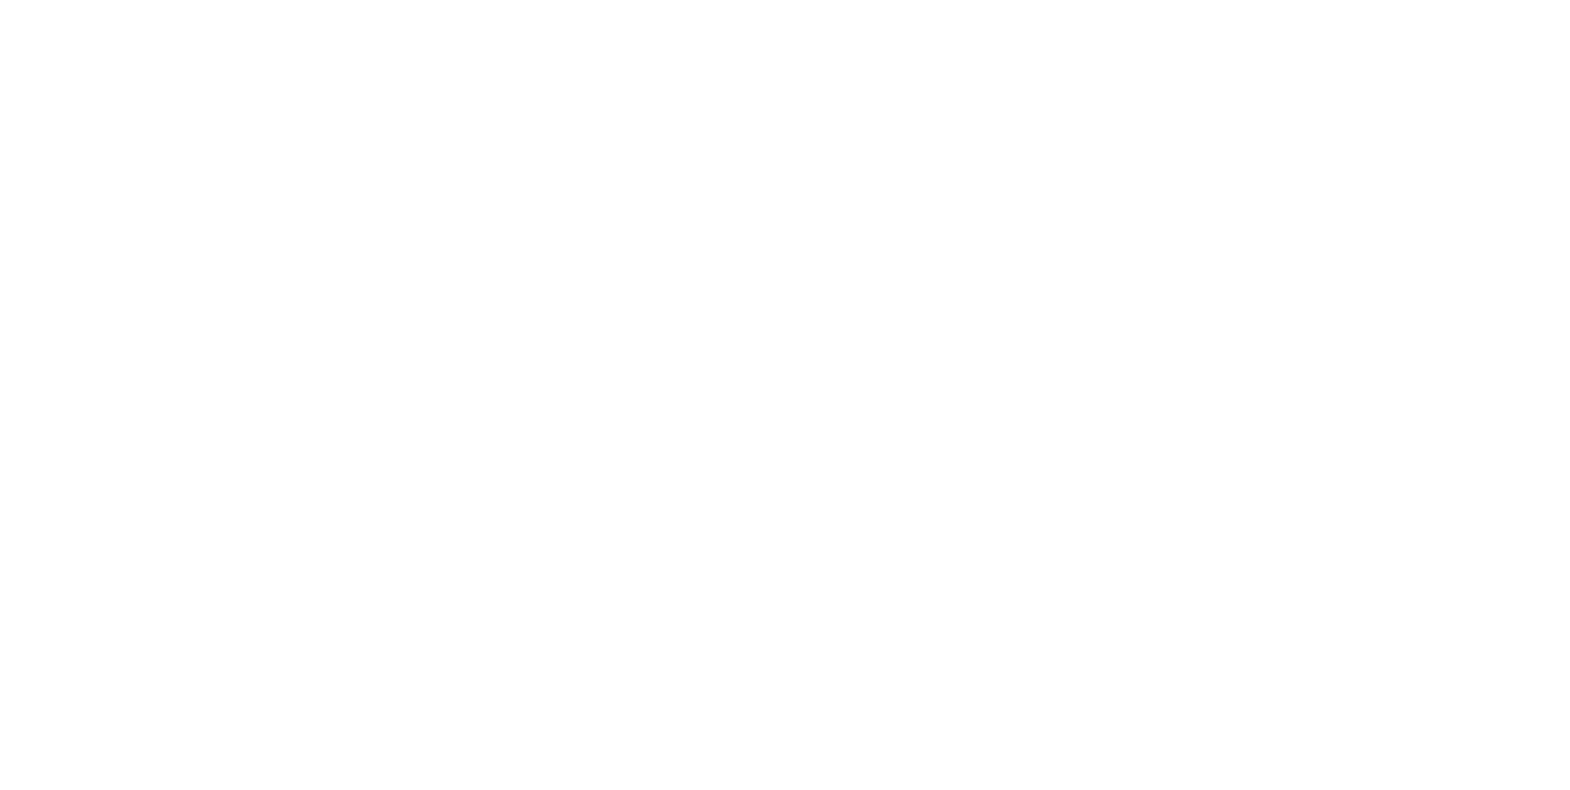

In [10]:
import logging
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Set up logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

logging.info("Starting Bag of Words Decision Tree classification")

# Fit and transform the preprocessed reviews
logging.info("Fitting and transforming preprocessed reviews using CountVectorizer")
vectorizer = CountVectorizer()
bow_features = vectorizer.fit_transform(df['preprocessed_review'])
logging.info(f"Shape of BoW features: {bow_features.shape}")

# Get the sentiment labels from the preprocessed DataFrame
logging.info("Extracting sentiment labels")
labels = df['sentiment']
logging.info(f"Number of labels: {len(labels)}")

# Split the data into training and testing sets
logging.info("Splitting data into training and testing sets")
X_train, X_test, y_train, y_test = train_test_split(bow_features, labels, test_size=0.2, random_state=42)
logging.info(f"Training set shape: {X_train.shape}, Testing set shape: {X_test.shape}")

# Create and train the Decision Tree model
logging.info("Creating and training the Decision Tree model")
model = DecisionTreeClassifier(random_state=42)
logging.info(f"Decision Tree parameters: {model.get_params()}")
model.fit(X_train, y_train)
logging.info("Model training completed")

# Make predictions on the testing set
logging.info("Making predictions on the testing set")
y_pred = model.predict(X_test)
logging.info("Predictions completed")

# Evaluate the model's performance
logging.info("Evaluating model performance")
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

logging.info("Decision Tree Model Performance:")
logging.info(f"Accuracy: {accuracy:.4f}")
logging.info(f"Precision: {precision:.4f}")
logging.info(f"Recall: {recall:.4f}")
logging.info(f"F1 Score: {f1:.4f}")

print("Decision Tree Model Performance:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

logging.info("Bag of Words Decision Tree classification completed")

# Optional: Visualize the decision tree
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plot_tree(model, feature_names=vectorizer.get_feature_names_out(), class_names=model.classes_, filled=True, rounded=True)
plt.savefig('decision_tree.png')
logging.info("Decision tree visualization saved as 'decision_tree.png'")

Bagging DT

In [13]:
import logging
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Set up logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

logging.info("Starting Bag of Words Bagging Decision Tree classification")

# Fit and transform the preprocessed reviews
logging.info("Fitting and transforming preprocessed reviews using CountVectorizer")
vectorizer = CountVectorizer()
bow_features = vectorizer.fit_transform(df['preprocessed_review'])
logging.info(f"Shape of BoW features: {bow_features.shape}")

# Get the sentiment labels from the preprocessed DataFrame
logging.info("Extracting sentiment labels")
labels = df['sentiment']
logging.info(f"Number of labels: {len(labels)}")

# Split the data into training and testing sets
logging.info("Splitting data into training and testing sets")
X_train, X_test, y_train, y_test = train_test_split(bow_features, labels, test_size=0.2, random_state=42)
logging.info(f"Training set shape: {X_train.shape}, Testing set shape: {X_test.shape}")

# Create and train the Bagging Decision Tree model
logging.info("Creating and training the Bagging Decision Tree model")
base_estimator = DecisionTreeClassifier(random_state=42)
model = BaggingClassifier(n_estimators=50, random_state=42)
logging.info(f"Bagging Classifier parameters: {model.get_params()}")
model.fit(X_train, y_train)
logging.info("Model training completed")

# Make predictions on the testing set
logging.info("Making predictions on the testing set")
y_pred = model.predict(X_test)
logging.info("Predictions completed")

# Evaluate the model's performance
logging.info("Evaluating model performance")
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

logging.info("Bagging Decision Tree Model Performance:")
logging.info(f"Accuracy: {accuracy:.4f}")
logging.info(f"Precision: {precision:.4f}")
logging.info(f"Recall: {recall:.4f}")
logging.info(f"F1 Score: {f1:.4f}")

print("Bagging Decision Tree Model Performance:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

logging.info("Bag of Words Bagging Decision Tree classification completed")

2024-08-20 02:14:31,859 - INFO - Starting Bag of Words Bagging Decision Tree classification
2024-08-20 02:14:31,860 - INFO - Fitting and transforming preprocessed reviews using CountVectorizer
2024-08-20 02:14:34,820 - INFO - Shape of BoW features: (50000, 216000)
2024-08-20 02:14:34,820 - INFO - Extracting sentiment labels
2024-08-20 02:14:34,821 - INFO - Number of labels: 50000
2024-08-20 02:14:34,821 - INFO - Splitting data into training and testing sets
2024-08-20 02:14:34,839 - INFO - Training set shape: (40000, 216000), Testing set shape: (10000, 216000)
2024-08-20 02:14:34,840 - INFO - Creating and training the Bagging Decision Tree model
2024-08-20 02:14:34,841 - INFO - Bagging Classifier parameters: {'bootstrap': True, 'bootstrap_features': False, 'estimator': None, 'max_features': 1.0, 'max_samples': 1.0, 'n_estimators': 50, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}
2024-08-20 02:34:54,762 - INFO - Model training completed
2024

Bagging Decision Tree Model Performance:
Accuracy: 0.8051
Precision: 0.8029
Recall: 0.8127
F1 Score: 0.8078


### Gradient Boosting

In [14]:
import logging
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Set up logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

logging.info("Starting Bag of Words Gradient Boosting classification")

# Fit and transform the preprocessed reviews
logging.info("Fitting and transforming preprocessed reviews using CountVectorizer")
vectorizer = CountVectorizer()
bow_features = vectorizer.fit_transform(df['preprocessed_review'])
logging.info(f"Shape of BoW features: {bow_features.shape}")

# Get the sentiment labels from the preprocessed DataFrame
logging.info("Extracting sentiment labels")
labels = df['sentiment']
logging.info(f"Number of labels: {len(labels)}")

# Split the data into training and testing sets
logging.info("Splitting data into training and testing sets")
X_train, X_test, y_train, y_test = train_test_split(bow_features, labels, test_size=0.2, random_state=42)
logging.info(f"Training set shape: {X_train.shape}, Testing set shape: {X_test.shape}")

# Create and train the Gradient Boosting Decision Tree model
logging.info("Creating and training the Gradient Boosting Classifier model")
model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
logging.info(f"Gradient Boosting Classifier parameters: {model.get_params()}")
model.fit(X_train, y_train)
logging.info("Model training completed")

# Make predictions on the testing set
logging.info("Making predictions on the testing set")
y_pred = model.predict(X_test)
logging.info("Predictions completed")

# Evaluate the model's performance
logging.info("Evaluating model performance")
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

logging.info("BoW Gradient Boosting Classifier Model Performance:")
logging.info(f"Accuracy: {accuracy:.4f}")
logging.info(f"Precision: {precision:.4f}")
logging.info(f"Recall: {recall:.4f}")
logging.info(f"F1 Score: {f1:.4f}")

print("BoW Gradient Boosting Classifier Model Performance:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

logging.info("Bag of Words Gradient Boosting classification completed")

2024-08-20 02:34:56,575 - INFO - Starting Bag of Words Gradient Boosting classification
2024-08-20 02:34:56,576 - INFO - Fitting and transforming preprocessed reviews using CountVectorizer
2024-08-20 02:34:59,148 - INFO - Shape of BoW features: (50000, 216000)
2024-08-20 02:34:59,148 - INFO - Extracting sentiment labels
2024-08-20 02:34:59,148 - INFO - Number of labels: 50000
2024-08-20 02:34:59,149 - INFO - Splitting data into training and testing sets
2024-08-20 02:34:59,168 - INFO - Training set shape: (40000, 216000), Testing set shape: (10000, 216000)
2024-08-20 02:34:59,169 - INFO - Creating and training the Gradient Boosting Classifier model
2024-08-20 02:34:59,173 - INFO - Gradient Boosting Classifier parameters: {'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.1, 'loss': 'log_loss', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf'

BoW Gradient Boosting Classifier Model Performance:
Accuracy: 0.8146
Precision: 0.8177
Recall: 0.8146
F1 Score: 0.8140


### Random Forest

In [15]:
import logging
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Set up logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

logging.info("Starting Bag of Words Random Forest classification")

# Fit and transform the preprocessed reviews
logging.info("Fitting and transforming preprocessed reviews using CountVectorizer")
vectorizer = CountVectorizer()
bow_features = vectorizer.fit_transform(df['preprocessed_review'])
logging.info(f"Shape of BoW features: {bow_features.shape}")

# Get the sentiment labels from the preprocessed DataFrame
logging.info("Extracting sentiment labels")
labels = df['sentiment']
logging.info(f"Number of labels: {len(labels)}")

# Split the data into training and testing sets
logging.info("Splitting data into training and testing sets")
X_train, X_test, y_train, y_test = train_test_split(bow_features, labels, test_size=0.2, random_state=42)
logging.info(f"Training set shape: {X_train.shape}, Testing set shape: {X_test.shape}")

# Create and train the Random Forest model
logging.info("Creating and training the Random Forest Classifier model")
model = RandomForestClassifier(n_estimators=100, random_state=42)
logging.info(f"Random Forest Classifier parameters: {model.get_params()}")
model.fit(X_train, y_train)
logging.info("Model training completed")

# Make predictions on the testing set
logging.info("Making predictions on the testing set")
y_pred = model.predict(X_test)
logging.info("Predictions completed")

# Evaluate the model's performance
logging.info("Evaluating model performance")
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

logging.info("BoW Random Forest Model Performance:")
logging.info(f"Accuracy: {accuracy:.4f}")
logging.info(f"Precision: {precision:.4f}")
logging.info(f"Recall: {recall:.4f}")
logging.info(f"F1 Score: {f1:.4f}")

print("BoW Random Forest Model Performance:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Optional: Feature Importance
feature_importance = model.feature_importances_
feature_names = vectorizer.get_feature_names_out()
feature_importance_dict = dict(zip(feature_names, feature_importance))
top_features = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)[:10]
logging.info("Top 10 important features:")
for feature, importance in top_features:
    logging.info(f"{feature}: {importance:.4f}")

logging.info("Bag of Words Random Forest classification completed")

2024-08-20 02:49:22,294 - INFO - Starting Bag of Words Random Forest classification
2024-08-20 02:49:22,295 - INFO - Fitting and transforming preprocessed reviews using CountVectorizer
2024-08-20 02:49:24,822 - INFO - Shape of BoW features: (50000, 216000)
2024-08-20 02:49:24,823 - INFO - Extracting sentiment labels
2024-08-20 02:49:24,823 - INFO - Number of labels: 50000
2024-08-20 02:49:24,823 - INFO - Splitting data into training and testing sets
2024-08-20 02:49:24,842 - INFO - Training set shape: (40000, 216000), Testing set shape: (10000, 216000)
2024-08-20 02:49:24,842 - INFO - Creating and training the Random Forest Classifier model
2024-08-20 02:49:24,843 - INFO - Random Forest Classifier parameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'm

BoW Random Forest Model Performance:
Accuracy: 0.8580
Precision: 0.8604
Recall: 0.8573
F1 Score: 0.8588


2024-08-20 02:52:24,268 - INFO - Top 10 important features:
2024-08-20 02:52:24,268 - INFO - bad: 0.0097
2024-08-20 02:52:24,268 - INFO - worst: 0.0084
2024-08-20 02:52:24,269 - INFO - awful: 0.0054
2024-08-20 02:52:24,269 - INFO - great: 0.0053
2024-08-20 02:52:24,269 - INFO - terrible: 0.0044
2024-08-20 02:52:24,269 - INFO - waste: 0.0042
2024-08-20 02:52:24,269 - INFO - excellent: 0.0034
2024-08-20 02:52:24,269 - INFO - worse: 0.0032
2024-08-20 02:52:24,270 - INFO - nothing: 0.0032
2024-08-20 02:52:24,270 - INFO - boring: 0.0030
2024-08-20 02:52:24,270 - INFO - Bag of Words Random Forest classification completed


### Voting Classifier

In [16]:
import logging
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Set up logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

logging.info("Starting Bag of Words Voting Classifier classification")

# Fit and transform the preprocessed reviews
logging.info("Fitting and transforming preprocessed reviews using CountVectorizer")
vectorizer = CountVectorizer()
bow_features = vectorizer.fit_transform(df['preprocessed_review'])
logging.info(f"Shape of BoW features: {bow_features.shape}")

# Get the sentiment labels from the preprocessed DataFrame
logging.info("Extracting sentiment labels")
labels = df['sentiment']
logging.info(f"Number of labels: {len(labels)}")

# Split the data into training and testing sets
logging.info("Splitting data into training and testing sets")
X_train, X_test, y_train, y_test = train_test_split(bow_features, labels, test_size=0.2, random_state=42)
logging.info(f"Training set shape: {X_train.shape}, Testing set shape: {X_test.shape}")

# Define the base models
logging.info("Defining base models")
log_clf = LogisticRegression(max_iter=1000, random_state=42)
dt_clf = DecisionTreeClassifier(random_state=42)
svm_clf = SVC(kernel='linear', probability=True, random_state=42)

# Create and train the Voting Classifier model
logging.info("Creating and training the Voting Classifier model")
model = VotingClassifier(estimators=[
    ('lr', log_clf),
    ('dt', dt_clf),
    ('svm', svm_clf)
], voting='soft')  # Use 'soft' voting to consider predicted probabilities
logging.info(f"Voting Classifier parameters: {model.get_params()}")
model.fit(X_train, y_train)
logging.info("Model training completed")

# Make predictions on the testing set
logging.info("Making predictions on the testing set")
y_pred = model.predict(X_test)
logging.info("Predictions completed")

# Evaluate the model's performance
logging.info("Evaluating model performance")
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

logging.info("BoW Voting Classifier Model Performance:")
logging.info(f"Accuracy: {accuracy:.4f}")
logging.info(f"Precision: {precision:.4f}")
logging.info(f"Recall: {recall:.4f}")
logging.info(f"F1 Score: {f1:.4f}")

print("BoW Voting Classifier Model Performance:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Optional: Individual classifier performance
logging.info("Evaluating individual classifier performance")
for clf_name, clf in [('Logistic Regression', log_clf), ('Decision Tree', dt_clf), ('SVM', svm_clf)]:
    clf.fit(X_train, y_train)
    clf_pred = clf.predict(X_test)
    clf_accuracy = accuracy_score(y_test, clf_pred)
    logging.info(f"{clf_name} Accuracy: {clf_accuracy:.4f}")

logging.info("Bag of Words Voting Classifier classification completed")

2024-08-20 02:52:24,276 - INFO - Starting Bag of Words Voting Classifier classification
2024-08-20 02:52:24,277 - INFO - Fitting and transforming preprocessed reviews using CountVectorizer
2024-08-20 02:52:26,800 - INFO - Shape of BoW features: (50000, 216000)
2024-08-20 02:52:26,800 - INFO - Extracting sentiment labels
2024-08-20 02:52:26,801 - INFO - Number of labels: 50000
2024-08-20 02:52:26,801 - INFO - Splitting data into training and testing sets
2024-08-20 02:52:26,820 - INFO - Training set shape: (40000, 216000), Testing set shape: (10000, 216000)
2024-08-20 02:52:26,821 - INFO - Defining base models
2024-08-20 02:52:26,821 - INFO - Creating and training the Voting Classifier model
2024-08-20 02:52:26,834 - INFO - Voting Classifier parameters: {'estimators': [('lr', LogisticRegression(max_iter=1000, random_state=42)), ('dt', DecisionTreeClassifier(random_state=42)), ('svm', SVC(kernel='linear', probability=True, random_state=42))], 'flatten_transform': True, 'n_jobs': None, 'v

BoW Voting Classifier Model Performance:
Accuracy: 0.8730
Precision: 0.8667
Recall: 0.8839
F1 Score: 0.8752


2024-08-20 06:42:27,665 - INFO - Logistic Regression Accuracy: 0.8854
2024-08-20 06:43:01,549 - INFO - Decision Tree Accuracy: 0.7248


### Nerual Network

In [5]:
import logging
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Set up logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

logging.info("Starting Bag of Words Neural Network classification")

# Fit and transform the preprocessed reviews
logging.info("Fitting and transforming preprocessed reviews using CountVectorizer")
vectorizer = CountVectorizer()
bow_features = vectorizer.fit_transform(df['preprocessed_review'])
logging.info(f"Shape of BoW features: {bow_features.shape}")

# Get the sentiment labels from the preprocessed DataFrame and encode them
logging.info("Encoding sentiment labels")
labels = df['sentiment']
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)
logging.info(f"Number of classes: {len(label_encoder.classes_)}")

# Split the data into training and testing sets
logging.info("Splitting data into training and testing sets")
X_train, X_test, y_train, y_test = train_test_split(bow_features.toarray(), encoded_labels, test_size=0.2, random_state=42)
logging.info(f"Training set shape: {X_train.shape}, Testing set shape: {X_test.shape}")

# Build the neural network model
logging.info("Building the neural network model")
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))  # Input layer
model.add(Dropout(0.5))  # Dropout for regularization
model.add(Dense(64, activation='relu'))  # Hidden layer
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification

# Compile the model
logging.info("Compiling the model")
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Display model summary
model.summary(print_fn=logging.info)

# Train the model
logging.info("Training the model")
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=0)

# Log training history
logging.info("Training history:")
for epoch, (loss, accuracy, val_loss, val_accuracy) in enumerate(zip(
    history.history['loss'], history.history['accuracy'],
    history.history['val_loss'], history.history['val_accuracy']), 1):
    logging.info(f"Epoch {epoch}: loss={loss:.4f}, accuracy={accuracy:.4f}, val_loss={val_loss:.4f}, val_accuracy={val_accuracy:.4f}")

# Make predictions on the testing set
logging.info("Making predictions on the testing set")
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype("int32").flatten()
logging.info("Predictions completed")

# Evaluate the model's performance
logging.info("Evaluating model performance")
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

logging.info("Neural Network Model Performance:")
logging.info(f"Accuracy: {accuracy:.4f}")
logging.info(f"Precision: {precision:.4f}")
logging.info(f"Recall: {recall:.4f}")
logging.info(f"F1 Score: {f1:.4f}")

print("Neural Network Model Performance:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

logging.info("Bag of Words Neural Network classification completed")

2024-08-20 10:55:56,286 - INFO - Starting Bag of Words Neural Network classification
2024-08-20 10:55:56,287 - INFO - Fitting and transforming preprocessed reviews using CountVectorizer
2024-08-20 10:55:59,141 - INFO - Shape of BoW features: (50000, 216000)
2024-08-20 10:55:59,142 - INFO - Encoding sentiment labels
2024-08-20 10:55:59,144 - INFO - Number of classes: 2
2024-08-20 10:55:59,144 - INFO - Splitting data into training and testing sets


: 

### CNN

In [6]:
import logging
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, GlobalMaxPooling1D, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Set up logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

logging.info("Starting Bag of Words Convolutional Neural Network classification")

# Convert the reviews into bag-of-words features
logging.info("Converting reviews to Bag-of-Words features")
vectorizer = CountVectorizer(max_features=10000)  # Limit to top 10,000 words
bow_features = vectorizer.fit_transform(df['preprocessed_review'])
logging.info(f"Shape of BoW features: {bow_features.shape}")

# Get the sentiment labels from the preprocessed DataFrame and encode them
logging.info("Encoding sentiment labels")
labels = df['sentiment']
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)
logging.info(f"Number of classes: {len(label_encoder.classes_)}")

# Split the data into training and testing sets
logging.info("Splitting data into training and testing sets")
X_train, X_test, y_train, y_test = train_test_split(bow_features.toarray(), encoded_labels, test_size=0.2, random_state=42)
logging.info(f"Training set shape: {X_train.shape}, Testing set shape: {X_test.shape}")

# Reshape input data to 2D for Conv1D layer (samples, timesteps, features)
logging.info("Reshaping input data for Conv1D layer")
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)
logging.info(f"Reshaped training set: {X_train.shape}, Reshaped testing set: {X_test.shape}")

# Build the Convolutional Neural Network model
logging.info("Building the Convolutional Neural Network model")
model = Sequential()
model.add(Conv1D(filters=128, kernel_size=5, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(GlobalMaxPooling1D())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification

# Compile the model
logging.info("Compiling the model")
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Display model summary
model.summary(print_fn=logging.info)

# Train the model
logging.info("Training the model")
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=0)

# Log training history
logging.info("Training history:")
for epoch, (loss, accuracy, val_loss, val_accuracy) in enumerate(zip(
    history.history['loss'], history.history['accuracy'],
    history.history['val_loss'], history.history['val_accuracy']), 1):
    logging.info(f"Epoch {epoch}: loss={loss:.4f}, accuracy={accuracy:.4f}, val_loss={val_loss:.4f}, val_accuracy={val_accuracy:.4f}")

# Make predictions on the testing set
logging.info("Making predictions on the testing set")
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype("int32").flatten()
logging.info("Predictions completed")

# Evaluate the model's performance
logging.info("Evaluating model performance")
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

logging.info("Convolutional Neural Network Model Performance:")
logging.info(f"Accuracy: {accuracy:.4f}")
logging.info(f"Precision: {precision:.4f}")
logging.info(f"Recall: {recall:.4f}")
logging.info(f"F1 Score: {f1:.4f}")

print("Convolutional Neural Network Model Performance:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

logging.info("Bag of Words Convolutional Neural Network classification completed")

2024-08-20 11:01:40,645 - INFO - Starting Bag of Words Convolutional Neural Network classification
2024-08-20 11:01:40,645 - INFO - Converting reviews to Bag-of-Words features
2024-08-20 11:01:43,580 - INFO - Shape of BoW features: (50000, 10000)
2024-08-20 11:01:43,581 - INFO - Encoding sentiment labels
2024-08-20 11:01:43,583 - INFO - Number of classes: 2
2024-08-20 11:01:43,583 - INFO - Splitting data into training and testing sets
2024-08-20 11:01:45,670 - INFO - Training set shape: (40000, 10000), Testing set shape: (10000, 10000)
2024-08-20 11:01:45,672 - INFO - Reshaping input data for Conv1D layer
2024-08-20 11:01:45,673 - INFO - Reshaped training set: (40000, 10000, 1), Reshaped testing set: (10000, 10000, 1)
2024-08-20 11:01:45,673 - INFO - Building the Convolutional Neural Network model
/Users/fpolygon/.pyenv/versions/3.12.4/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer.

2024-08-20 11:01:45,733 - INFO - Model: "sequential"
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 9996, 128)      │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d            │ (None, 128)            │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)      

313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 24ms/step


2024-08-20 11:16:18,401 - INFO - Predictions completed
2024-08-20 11:16:18,401 - INFO - Evaluating model performance
/Users/fpolygon/.pyenv/versions/3.12.4/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
2024-08-20 11:16:18,414 - INFO - Convolutional Neural Network Model Performance:
2024-08-20 11:16:18,414 - INFO - Accuracy: 0.4961
2024-08-20 11:16:18,414 - INFO - Precision: 0.0000
2024-08-20 11:16:18,414 - INFO - Recall: 0.0000
2024-08-20 11:16:18,415 - INFO - F1 Score: 0.0000
2024-08-20 11:16:18,415 - INFO - Bag of Words Convolutional Neural Network classification completed


Convolutional Neural Network Model Performance:
Accuracy: 0.4961
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


### RNN

In [7]:
import logging
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Set up logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

logging.info("Starting LSTM Recurrent Neural Network classification")

# Set parameters
max_words = 10000  # Maximum number of words to consider in the tokenizer
max_len = 100  # Maximum length of the sequences (padded/truncated)
logging.info(f"Parameters: max_words={max_words}, max_len={max_len}")

# Prepare the tokenizer and fit on the reviews
logging.info("Preparing tokenizer and fitting on reviews")
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(df['preprocessed_review'])
logging.info(f"Vocabulary size: {len(tokenizer.word_index)}")

# Convert text to sequences of integers
logging.info("Converting text to sequences of integers")
sequences = tokenizer.texts_to_sequences(df['preprocessed_review'])

# Pad sequences to ensure they all have the same length
logging.info("Padding sequences")
X = pad_sequences(sequences, maxlen=max_len)
logging.info(f"Shape of padded sequences: {X.shape}")

# Encode the sentiment labels
logging.info("Encoding sentiment labels")
labels = df['sentiment']
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(labels)
logging.info(f"Number of classes: {len(label_encoder.classes_)}")

# Split the data into training and testing sets
logging.info("Splitting data into training and testing sets")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
logging.info(f"Training set shape: {X_train.shape}, Testing set shape: {X_test.shape}")

# Build the RNN model (using LSTM)
logging.info("Building the LSTM Recurrent Neural Network model")
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=128, input_length=max_len))  # Embedding layer
model.add(LSTM(128, return_sequences=False))  # LSTM layer
model.add(Dropout(0.5))  # Dropout for regularization
model.add(Dense(64, activation='relu'))  # Fully connected layer
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification

# Compile the model
logging.info("Compiling the model")
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Display model summary
model.summary(print_fn=logging.info)

# Train the model
logging.info("Training the model")
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=0)

# Log training history
logging.info("Training history:")
for epoch, (loss, accuracy, val_loss, val_accuracy) in enumerate(zip(
    history.history['loss'], history.history['accuracy'],
    history.history['val_loss'], history.history['val_accuracy']), 1):
    logging.info(f"Epoch {epoch}: loss={loss:.4f}, accuracy={accuracy:.4f}, val_loss={val_loss:.4f}, val_accuracy={val_accuracy:.4f}")

# Make predictions on the testing set
logging.info("Making predictions on the testing set")
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype("int32").flatten()
logging.info("Predictions completed")

# Evaluate the model's performance
logging.info("Evaluating model performance")
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

logging.info("Recurrent Neural Network (LSTM) Model Performance:")
logging.info(f"Accuracy: {accuracy:.4f}")
logging.info(f"Precision: {precision:.4f}")
logging.info(f"Recall: {recall:.4f}")
logging.info(f"F1 Score: {f1:.4f}")

print("Recurrent Neural Network (LSTM) Model Performance:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

logging.info("LSTM Recurrent Neural Network classification completed")

2024-08-20 11:17:08,581 - INFO - Starting LSTM Recurrent Neural Network classification
2024-08-20 11:17:08,581 - INFO - Parameters: max_words=10000, max_len=100
2024-08-20 11:17:08,582 - INFO - Preparing tokenizer and fitting on reviews
2024-08-20 11:17:11,933 - INFO - Vocabulary size: 216044
2024-08-20 11:17:11,933 - INFO - Converting text to sequences of integers
2024-08-20 11:17:13,772 - INFO - Padding sequences
2024-08-20 11:17:13,945 - INFO - Shape of padded sequences: (50000, 100)
2024-08-20 11:17:13,946 - INFO - Encoding sentiment labels
2024-08-20 11:17:13,948 - INFO - Number of classes: 2
2024-08-20 11:17:13,948 - INFO - Splitting data into training and testing sets
2024-08-20 11:17:13,987 - INFO - Training set shape: (40000, 100), Testing set shape: (10000, 100)
2024-08-20 11:17:13,987 - INFO - Building the LSTM Recurrent Neural Network model
/Users/fpolygon/.pyenv/versions/3.12.4/lib/python3.12/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input

2024-08-20 11:17:14,001 - INFO - Model: "sequential_1"
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ ?                      │   0 (unbuilt) │
├────────────────────

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step


2024-08-20 11:30:28,835 - INFO - Predictions completed
2024-08-20 11:30:28,835 - INFO - Evaluating model performance
2024-08-20 11:30:28,843 - INFO - Recurrent Neural Network (LSTM) Model Performance:
2024-08-20 11:30:28,844 - INFO - Accuracy: 0.8646
2024-08-20 11:30:28,844 - INFO - Precision: 0.8764
2024-08-20 11:30:28,844 - INFO - Recall: 0.8514
2024-08-20 11:30:28,844 - INFO - F1 Score: 0.8637
2024-08-20 11:30:28,845 - INFO - LSTM Recurrent Neural Network classification completed


Recurrent Neural Network (LSTM) Model Performance:
Accuracy: 0.8646
Precision: 0.8764
Recall: 0.8514
F1 Score: 0.8637


# Optimization

## Grid Search

In [8]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Fit and transform the preprocessed reviews
vectorizer = CountVectorizer()
bow_features = vectorizer.fit_transform(df['preprocessed_review'])

# Get the sentiment labels from the preprocessed DataFrame
labels = df['sentiment']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(bow_features, labels, test_size=0.2, random_state=42)

# Define the Naive Bayes model
model = MultinomialNB()

# Define the hyperparameters grid
param_grid = {
    'alpha': [0.1, 0.5, 1.0, 2.0, 5.0],  # Smoothing parameter
    'fit_prior': [True, False]  # Whether to learn class prior probabilities or not
}

# Set up Grid Search with cross-validation
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='f1', n_jobs=-1, verbose=2)

# Fit Grid Search
grid_search.fit(X_train, y_train)

# Get the best model from Grid Search
best_model = grid_search.best_estimator_

# Make predictions on the testing set with the best model
y_pred = best_model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)  # Specify the positive label
recall = recall_score(y_test, y_pred)  # Specify the positive label
f1 = f1_score(y_test, y_pred)  # Specify the positive label

print("Best Model Parameters from Grid Search:", grid_search.best_params_)
print("BoW Naive Bayes Model Performance after Grid Search:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END ..........................alpha=0.1, fit_prior=True; total time=   0.1s
[CV] END ..........................alpha=0.1, fit_prior=True; total time=   0.1s
[CV] END ..........................alpha=0.1, fit_prior=True; total time=   0.1s
[CV] END ..........................alpha=0.1, fit_prior=True; total time=   0.1s
[CV] END ..........................alpha=0.1, fit_prior=True; total time=   0.1s
[CV] END .........................alpha=0.1, fit_prior=False; total time=   0.1s
[CV] END .........................alpha=0.1, fit_prior=False; total time=   0.1s
[CV] END .........................alpha=0.1, fit_prior=False; total time=   0.1s
[CV] END ..........................alpha=0.5, fit_prior=True; total time=   0.1s
[CV] END ..........................alpha=0.5, fit_prior=True; total time=   0.1s
[CV] END .........................alpha=0.1, fit_prior=False; total time=   0.1s
[CV] END .........................alpha=0.1, fit

In [9]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer

# Fit and transform the preprocessed reviews
vectorizer = CountVectorizer()
bow_features = vectorizer.fit_transform(df['preprocessed_review'])

# Get the sentiment labels from the preprocessed DataFrame
labels = df['sentiment']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(bow_features, labels, test_size=0.2, random_state=42)

# Define the Naive Bayes model
model = MultinomialNB()

# Define the hyperparameter space
param_space = {
    'alpha': Real(0.01, 5.0, prior='log-uniform'),  # Log-uniform distribution is used for the smoothing parameter
    'fit_prior': Categorical([True, False])  # Categorical distribution for fit_prior
}

# Set up Bayesian Search with cross-validation
bayes_search = BayesSearchCV(
    estimator=model,
    search_spaces=param_space,
    n_iter=32,  # Number of parameter settings that are sampled
    cv=5,  # 5-fold cross-validation
    scoring='f1',
    n_jobs=-1,  # Use all available cores
    verbose=2,
    random_state=42
)

# Fit Bayesian Search
bayes_search.fit(X_train, y_train)

# Get the best model from Bayesian Search
best_model = bayes_search.best_estimator_

# Make predictions on the testing set with the best model
y_pred = best_model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)  # Specify the positive label
recall = recall_score(y_test, y_pred)  # Specify the positive label
f1 = f1_score(y_test, y_pred)  # Specify the positive label

print("Best Model Parameters from Bayesian Search:", bayes_search.best_params_)
print("BoW Naive Bayes Model Performance after Bayesian Search:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)



Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END .........alpha=0.12789638921577903, fit_prior=False; total time=   0.1s
[CV] END .........alpha=0.12789638921577903, fit_prior=False; total time=   0.1s
[CV] END .........alpha=0.12789638921577903, fit_prior=False; total time=   0.1s
[CV] END .........alpha=0.12789638921577903, fit_prior=False; total time=   0.1s
[CV] END .........alpha=0.12789638921577903, fit_prior=False; total time=   0.1s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END ..........alpha=1.8200614603794572, fit_prior=False; total time=   0.0s
[CV] END ..........alpha=1.8200614603794572, fit_prior=False; total time=   0.0s
[CV] END ..........alpha=1.8200614603794572, fit_prior=False; total time=   0.1s
[CV] END ..........alpha=1.8200614603794572, fit_prior=False; total time=   0.1s
[CV] END ..........alpha=1.8200614603794572, fit_prior=False; total time=   0.1s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END ....

In [10]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Get the sentiment labels from the preprocessed DataFrame
labels = df['sentiment']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(bow_features, labels, test_size=0.2, random_state=42)

# Define the Logistic Regression model
model = LogisticRegression(max_iter=2000)

# Define the hyperparameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength (inverse of regularization parameter)
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],  # Regularization types
    'solver': ['liblinear', 'saga']  # Solvers that support l1 and elasticnet penalties
}

# Set up Grid Search with cross-validation
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='f1', n_jobs=-1, verbose=2)

# Fit Grid Search
grid_search.fit(X_train, y_train)

# Get the best model from Grid Search
best_model = grid_search.best_estimator_

# Make predictions on the testing set with the best model
y_pred = best_model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Best Model Parameters from Grid Search:", grid_search.best_params_)
print("BoW Logistic Regression Model Performance after Grid Search:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV] END ...............C=0.01, penalty=l1, solver=liblinear; total time=   0.6s
[CV] END ...............C=0.01, penalty=l1, solver=liblinear; total time=   0.6s
[CV] END ...............C=0.01, penalty=l1, solver=liblinear; total time=   0.6s
[CV] END ...............C=0.01, penalty=l1, solver=liblinear; total time=   0.6s
[CV] END ...............C=0.01, penalty=l1, solver=liblinear; total time=   0.6s
[CV] END ...............C=0.01, penalty=l2, solver=liblinear; total time=   1.3s
[CV] END ...............C=0.01, penalty=l2, solver=liblinear; total time=   1.4s
[CV] END ...............C=0.01, penalty=l2, solver=liblinear; total time=   1.6s
[CV] END ...............C=0.01, penalty=l2, solver=liblinear; total time=   1.4s
[CV] END ...............C=0.01, penalty=l2, solver=liblinear; total time=   1.4s
[CV] END ....................C=0.01, penalty=l1, solver=saga; total time=   9.6s
[CV] END ....................C=0.01, penalty=l2

/Users/fpolygon/.pyenv/versions/3.12.4/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......................C=1, penalty=l2, solver=saga; total time= 1.3min
[CV] END .....................C=0.1, penalty=l1, solver=saga; total time= 6.3min
[CV] END .......................C=1, penalty=l2, solver=saga; total time= 1.1min
[CV] END ..........C=1, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END ..........C=1, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END ..........C=1, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END ..........C=1, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END ..........C=1, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END ...............C=1, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END ...............C=1, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END ...............C=1, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END ...............C=1, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END ...............C=1,

/Users/fpolygon/.pyenv/versions/3.12.4/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......................C=1, penalty=l2, solver=saga; total time= 1.4min
[CV] END .................C=10, penalty=l1, solver=liblinear; total time=   1.3s
[CV] END .......................C=1, penalty=l2, solver=saga; total time= 1.3min


/Users/fpolygon/.pyenv/versions/3.12.4/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......................C=1, penalty=l1, solver=saga; total time=57.1min


/Users/fpolygon/.pyenv/versions/3.12.4/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......................C=1, penalty=l1, solver=saga; total time=65.6min


/Users/fpolygon/.pyenv/versions/3.12.4/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......................C=1, penalty=l1, solver=saga; total time=66.4min
[CV] END .................C=10, penalty=l2, solver=liblinear; total time=   4.9s
[CV] END .................C=10, penalty=l2, solver=liblinear; total time=   4.8s
[CV] END .................C=10, penalty=l2, solver=liblinear; total time=   4.4s
[CV] END .................C=10, penalty=l2, solver=liblinear; total time=   4.0s
[CV] END .................C=10, penalty=l2, solver=liblinear; total time=   4.5s


/Users/fpolygon/.pyenv/versions/3.12.4/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......................C=1, penalty=l1, solver=saga; total time=66.8min


/Users/fpolygon/.pyenv/versions/3.12.4/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ......................C=10, penalty=l2, solver=saga; total time= 1.1min


/Users/fpolygon/.pyenv/versions/3.12.4/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ......................C=10, penalty=l2, solver=saga; total time= 1.4min


/Users/fpolygon/.pyenv/versions/3.12.4/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ......................C=10, penalty=l2, solver=saga; total time= 1.1min


/Users/fpolygon/.pyenv/versions/3.12.4/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......................C=1, penalty=l1, solver=saga; total time=65.3min
[CV] END .........C=10, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END .........C=10, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END .........C=10, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END .........C=10, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END .........C=10, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END ..............C=10, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END ..............C=10, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END ..............C=10, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END ..............C=10, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END ..............C=10, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END ...............C=10, penalty=none, solver=liblinear; total time=   0.0s
[CV] END ...............C=10

/Users/fpolygon/.pyenv/versions/3.12.4/lib/python3.12/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV] END ................C=100, penalty=l1, solver=liblinear; total time=   1.6s


/Users/fpolygon/.pyenv/versions/3.12.4/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ......................C=10, penalty=l2, solver=saga; total time= 1.4min


/Users/fpolygon/.pyenv/versions/3.12.4/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ......................C=10, penalty=l2, solver=saga; total time= 1.1min


/Users/fpolygon/.pyenv/versions/3.12.4/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .....................C=10, penalty=l1, solver=saga; total time=359.4min


/Users/fpolygon/.pyenv/versions/3.12.4/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .....................C=10, penalty=l1, solver=saga; total time=417.2min


/Users/fpolygon/.pyenv/versions/3.12.4/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .....................C=10, penalty=l1, solver=saga; total time=419.2min
[CV] END ................C=100, penalty=l2, solver=liblinear; total time=   6.2s
[CV] END ................C=100, penalty=l2, solver=liblinear; total time=   5.2s
[CV] END ................C=100, penalty=l2, solver=liblinear; total time=   4.6s
[CV] END ................C=100, penalty=l2, solver=liblinear; total time=   4.5s
[CV] END ................C=100, penalty=l2, solver=liblinear; total time=   4.5s


/Users/fpolygon/.pyenv/versions/3.12.4/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .....................C=100, penalty=l2, solver=saga; total time= 1.3min


/Users/fpolygon/.pyenv/versions/3.12.4/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .....................C=10, penalty=l1, solver=saga; total time=421.2min


/Users/fpolygon/.pyenv/versions/3.12.4/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .....................C=100, penalty=l2, solver=saga; total time= 1.3min


/Users/fpolygon/.pyenv/versions/3.12.4/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .....................C=100, penalty=l2, solver=saga; total time= 1.3min


/Users/fpolygon/.pyenv/versions/3.12.4/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .....................C=100, penalty=l2, solver=saga; total time= 1.3min
[CV] END ........C=100, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END ........C=100, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END ........C=100, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END ........C=100, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END ........C=100, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END .............C=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END .............C=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END .............C=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END .............C=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END .............C=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END ..............C=100, penalty=none, solver=liblinear; total time=   0.0s
[CV] END ..............C=100

/Users/fpolygon/.pyenv/versions/3.12.4/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .....................C=100, penalty=l2, solver=saga; total time= 1.3min


/Users/fpolygon/.pyenv/versions/3.12.4/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .....................C=10, penalty=l1, solver=saga; total time=412.1min


/Users/fpolygon/.pyenv/versions/3.12.4/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ....................C=100, penalty=l1, solver=saga; total time=730.5min


/Users/fpolygon/.pyenv/versions/3.12.4/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ....................C=100, penalty=l1, solver=saga; total time=732.1min


/Users/fpolygon/.pyenv/versions/3.12.4/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ....................C=100, penalty=l1, solver=saga; total time=737.0min


/Users/fpolygon/.pyenv/versions/3.12.4/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ....................C=100, penalty=l1, solver=saga; total time=623.5min


/Users/fpolygon/.pyenv/versions/3.12.4/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/fpolygon/.pyenv/versions/3.12.4/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
100 fits failed out of a total of 200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/fpolygon/.pyenv/versions/3.12.4/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/fpolygon/.pyenv/versions/3.12.4/lib/pyth

[CV] END ....................C=100, penalty=l1, solver=saga; total time=677.9min
Best Model Parameters from Grid Search: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
BoW Logistic Regression Model Performance after Grid Search:
Accuracy: 0.8927
Precision: 0.8871534556813745
Recall: 0.9017662234570352
F1 Score: 0.8944001574648165


In [11]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Fit and transform the preprocessed reviews
vectorizer = CountVectorizer()
bow_features = vectorizer.fit_transform(df['preprocessed_review'])

# Get the sentiment labels from the preprocessed DataFrame
labels = df['sentiment']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(bow_features, labels, test_size=0.2, random_state=42)

# Define the K-Nearest Neighbors model
model = KNeighborsClassifier()

# Define the hyperparameter grid
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],  # Number of neighbors to use
    'weights': ['uniform', 'distance'],  # Weight function used in prediction
    'metric': ['euclidean', 'manhattan', 'minkowski']  # Distance metric
}

# Set up Grid Search with cross-validation
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='f1', n_jobs=-1, verbose=2)

# Fit Grid Search
grid_search.fit(X_train, y_train)

# Get the best model from Grid Search
best_model = grid_search.best_estimator_

# Make predictions on the testing set with the best model
y_pred = best_model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Best Model Parameters from Grid Search:", grid_search.best_params_)
print("BoW K-Nearest Neighbors Model Performance after Grid Search:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] END ..metric=euclidean, n_neighbors=3, weights=distance; total time=  23.3s
[CV] END ...metric=euclidean, n_neighbors=3, weights=uniform; total time=  23.6s
[CV] END ..metric=euclidean, n_neighbors=3, weights=distance; total time=  23.6s
[CV] END ..metric=euclidean, n_neighbors=3, weights=distance; total time=  23.6s
[CV] END ...metric=euclidean, n_neighbors=3, weights=uniform; total time=  25.5s
[CV] END ...metric=euclidean, n_neighbors=3, weights=uniform; total time=  23.7s
[CV] END ...metric=euclidean, n_neighbors=3, weights=uniform; total time=  23.7s
[CV] END ...metric=euclidean, n_neighbors=3, weights=uniform; total time=  23.7s
[CV] END ..metric=euclidean, n_neighbors=3, weights=distance; total time=  20.4s
[CV] END ...metric=euclidean, n_neighbors=5, weights=uniform; total time=  24.7s
[CV] END ..metric=euclidean, n_neighbors=5, weights=distance; total time=  24.8s
[CV] END ...metric=euclidean, n_neighbors=5, we

## Naive Bayes

### Naive Bayes: Grid Search

### Naive Bayes: Bayes Search

## Logistic Regression

### Logistic regression: Grid Search

### Logistic Regression: Bayes Search

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from skopt import BayesSearchCV
from skopt.space import Real, Categorical

# Get the sentiment labels from the preprocessed DataFrame
labels = df['sentiment']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(bow_features, labels, test_size=0.2, random_state=42)

# Define the Logistic Regression model
model = LogisticRegression(max_iter=2000)

# Define the hyperparameter space
param_space = {
    'C': Real(0.01, 100, prior='log-uniform'),  # Regularization strength (log-uniform distribution)
    'penalty': Categorical(['l1', 'l2']),  # Regularization types
    'solver': Categorical(['liblinear', 'saga'])  # Solvers that support l1 and l2 penalties
}

# Set up Bayesian Search with cross-validation
bayes_search = BayesSearchCV(
    estimator=model,
    search_spaces=param_space,
    n_iter=32,  # Number of parameter settings that are sampled
    cv=5,  # 5-fold cross-validation
    scoring='f1',
    n_jobs=-1,  # Use all available cores
    verbose=2,
    random_state=42
)

# Fit Bayesian Search
bayes_search.fit(X_train, y_train)

# Get the best model from Bayesian Search
best_model = bayes_search.best_estimator_

# Make predictions on the testing set with the best model
y_pred = best_model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Best Model Parameters from Bayesian Search:", bayes_search.best_params_)
print("BoW Logistic Regression Model Performance after Bayesian Search:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END ......C=0.4369339947510315, penalty=l2, solver=saga; total time=  56.0s
[CV] END ......C=0.4369339947510315, penalty=l2, solver=saga; total time=  58.7s
[CV] END ......C=0.4369339947510315, penalty=l2, solver=saga; total time= 1.1min
[CV] END ......C=0.4369339947510315, penalty=l2, solver=saga; total time= 1.2min
[CV] END ......C=0.4369339947510315, penalty=l2, solver=saga; total time= 1.3min
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END .C=22.364202820542708, penalty=l2, solver=liblinear; total time=   5.6s
[CV] END .C=22.364202820542708, penalty=l2, solver=liblinear; total time=   6.1s
[CV] END .C=22.364202820542708, penalty=l2, solver=liblinear; total time=   5.8s
[CV] END .C=22.364202820542708, penalty=l2, solver=liblinear; total time=   5.9s
[CV] END .C=22.364202820542708, penalty=l2, solver=liblinear; total time=   6.7s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END .C=0

/Users/fpolygon/.pyenv/versions/3.12.4/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ......C=17.76576664980768, penalty=l1, solver=saga; total time=397.0min


/Users/fpolygon/.pyenv/versions/3.12.4/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ......C=17.76576664980768, penalty=l1, solver=saga; total time=453.2min


/Users/fpolygon/.pyenv/versions/3.12.4/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ......C=17.76576664980768, penalty=l1, solver=saga; total time=454.1min


/Users/fpolygon/.pyenv/versions/3.12.4/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ......C=17.76576664980768, penalty=l1, solver=saga; total time=455.3min
[CV] END ......C=17.76576664980768, penalty=l1, solver=saga; total time=458.6min
Fitting 5 folds for each of 1 candidates, totalling 5 fits


/Users/fpolygon/.pyenv/versions/3.12.4/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/fpolygon/.pyenv/versions/3.12.4/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .....C=15.783879853890564, penalty=l1, solver=saga; total time=379.5min


/Users/fpolygon/.pyenv/versions/3.12.4/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .....C=15.783879853890564, penalty=l1, solver=saga; total time=435.6min


/Users/fpolygon/.pyenv/versions/3.12.4/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .....C=15.783879853890564, penalty=l1, solver=saga; total time=436.4min


/Users/fpolygon/.pyenv/versions/3.12.4/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .....C=15.783879853890564, penalty=l1, solver=saga; total time=437.2min
[CV] END .....C=15.783879853890564, penalty=l1, solver=saga; total time=440.1min
Fitting 5 folds for each of 1 candidates, totalling 5 fits


/Users/fpolygon/.pyenv/versions/3.12.4/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ..C=8.632012725909878, penalty=l2, solver=liblinear; total time=   5.5s
[CV] END ..C=8.632012725909878, penalty=l2, solver=liblinear; total time=   5.7s
[CV] END ..C=8.632012725909878, penalty=l2, solver=liblinear; total time=   6.1s
[CV] END ..C=8.632012725909878, penalty=l2, solver=liblinear; total time=   6.3s
[CV] END ..C=8.632012725909878, penalty=l2, solver=liblinear; total time=   5.9s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END .C=2.9397976202716882, penalty=l2, solver=liblinear; total time=   4.7s
[CV] END .C=2.9397976202716882, penalty=l2, solver=liblinear; total time=   5.5s
[CV] END .C=2.9397976202716882, penalty=l2, solver=liblinear; total time=   5.7s
[CV] END .C=2.9397976202716882, penalty=l2, solver=liblinear; total time=   5.8s
[CV] END .C=2.9397976202716882, penalty=l2, solver=liblinear; total time=   6.1s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END ..C=1.491462267977867, penalty=l2, solver=liblinear; total time

/Users/fpolygon/.pyenv/versions/3.12.4/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=66.36085077612337, penalty=l2, solver=saga; total time= 1.4min


/Users/fpolygon/.pyenv/versions/3.12.4/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/fpolygon/.pyenv/versions/3.12.4/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=66.36085077612337, penalty=l2, solver=saga; total time= 1.4min
[CV] END .......C=66.36085077612337, penalty=l2, solver=saga; total time= 1.4min


/Users/fpolygon/.pyenv/versions/3.12.4/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=66.36085077612337, penalty=l2, solver=saga; total time= 1.4min


/Users/fpolygon/.pyenv/versions/3.12.4/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=66.36085077612337, penalty=l2, solver=saga; total time= 1.4min
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END ....C=0.010340016434251914, penalty=l2, solver=saga; total time=   4.9s
[CV] END ....C=0.010340016434251914, penalty=l2, solver=saga; total time=   6.6s
[CV] END ....C=0.010340016434251914, penalty=l2, solver=saga; total time=   6.7s
[CV] END ....C=0.010340016434251914, penalty=l2, solver=saga; total time=   6.7s
[CV] END ....C=0.010340016434251914, penalty=l2, solver=saga; total time=   6.8s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END C=0.016694592785323554, penalty=l2, solver=liblinear; total time=   1.3s
[CV] END C=0.016694592785323554, penalty=l2, solver=liblinear; total time=   1.3s
[CV] END C=0.016694592785323554, penalty=l2, solver=liblinear; total time=   1.4s
[CV] END C=0.016694592785323554, penalty=l2, solver=liblinear; total time=   1.4s
[CV] END C=0.016694592785323554, penalty=l2, solver=liblinear; total

/Users/fpolygon/.pyenv/versions/3.12.4/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ......C=0.5105493247914744, penalty=l1, solver=saga; total time=25.8min


/Users/fpolygon/.pyenv/versions/3.12.4/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ......C=0.5105493247914744, penalty=l1, solver=saga; total time=28.9min


/Users/fpolygon/.pyenv/versions/3.12.4/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ......C=0.5105493247914744, penalty=l1, solver=saga; total time=29.0min


/Users/fpolygon/.pyenv/versions/3.12.4/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ......C=0.5105493247914744, penalty=l1, solver=saga; total time=29.1min


/Users/fpolygon/.pyenv/versions/3.12.4/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ......C=0.5105493247914744, penalty=l1, solver=saga; total time=29.2min
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END ..C=2.242158263729326, penalty=l1, solver=liblinear; total time=   1.1s
[CV] END ..C=2.242158263729326, penalty=l1, solver=liblinear; total time=   1.2s
[CV] END ..C=2.242158263729326, penalty=l1, solver=liblinear; total time=   1.1s
[CV] END ..C=2.242158263729326, penalty=l1, solver=liblinear; total time=   1.2s
[CV] END ..C=2.242158263729326, penalty=l1, solver=liblinear; total time=   1.2s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END .....C=0.21004231826213174, penalty=l1, solver=saga; total time= 8.2min


/Users/fpolygon/.pyenv/versions/3.12.4/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .....C=0.21004231826213174, penalty=l1, solver=saga; total time=10.9min


/Users/fpolygon/.pyenv/versions/3.12.4/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .....C=0.21004231826213174, penalty=l1, solver=saga; total time=11.3min


/Users/fpolygon/.pyenv/versions/3.12.4/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .....C=0.21004231826213174, penalty=l1, solver=saga; total time=11.3min


/Users/fpolygon/.pyenv/versions/3.12.4/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .....C=0.21004231826213174, penalty=l1, solver=saga; total time=11.4min
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END .....C=0.04225739818165358, penalty=l2, solver=saga; total time=  12.3s
[CV] END .....C=0.04225739818165358, penalty=l2, solver=saga; total time=  17.0s
[CV] END .....C=0.04225739818165358, penalty=l2, solver=saga; total time=  17.1s
[CV] END .....C=0.04225739818165358, penalty=l2, solver=saga; total time=  17.2s
[CV] END .....C=0.04225739818165358, penalty=l2, solver=saga; total time=  17.4s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END ..C=99.80972925829565, penalty=l2, solver=liblinear; total time=   4.7s
[CV] END ..C=99.80972925829565, penalty=l2, solver=liblinear; total time=   5.8s
[CV] END ..C=99.80972925829565, penalty=l2, solver=liblinear; total time=   6.2s
[CV] END ..C=99.80972925829565, penalty=l2, solver=liblinear; total time=   6.1s
[CV] END ..C=99.80972925829565, penalty=l2, solver=liblinear; total time

/Users/fpolygon/.pyenv/versions/3.12.4/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ......C=5.837075097063464, penalty=l1, solver=saga; total time=224.4min


/Users/fpolygon/.pyenv/versions/3.12.4/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ......C=5.837075097063464, penalty=l1, solver=saga; total time=266.8min


/Users/fpolygon/.pyenv/versions/3.12.4/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ......C=5.837075097063464, penalty=l1, solver=saga; total time=267.0min


/Users/fpolygon/.pyenv/versions/3.12.4/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ......C=5.837075097063464, penalty=l1, solver=saga; total time=268.1min


/Users/fpolygon/.pyenv/versions/3.12.4/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ......C=5.837075097063464, penalty=l1, solver=saga; total time=269.4min
Fitting 5 folds for each of 1 candidates, totalling 5 fits


/Users/fpolygon/.pyenv/versions/3.12.4/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=99.6475897081206, penalty=l1, solver=saga; total time=627.3min


/Users/fpolygon/.pyenv/versions/3.12.4/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=99.6475897081206, penalty=l1, solver=saga; total time=678.2min


/Users/fpolygon/.pyenv/versions/3.12.4/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=99.6475897081206, penalty=l1, solver=saga; total time=679.8min


/Users/fpolygon/.pyenv/versions/3.12.4/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=99.6475897081206, penalty=l1, solver=saga; total time=684.7min


/Users/fpolygon/.pyenv/versions/3.12.4/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=99.6475897081206, penalty=l1, solver=saga; total time=685.5min
Fitting 5 folds for each of 1 candidates, totalling 5 fits


/Users/fpolygon/.pyenv/versions/3.12.4/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=6.332280073417471, penalty=l2, solver=saga; total time= 1.3min


/Users/fpolygon/.pyenv/versions/3.12.4/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=6.332280073417471, penalty=l2, solver=saga; total time= 1.3min


/Users/fpolygon/.pyenv/versions/3.12.4/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=6.332280073417471, penalty=l2, solver=saga; total time= 1.3min


/Users/fpolygon/.pyenv/versions/3.12.4/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=6.332280073417471, penalty=l2, solver=saga; total time= 1.3min


/Users/fpolygon/.pyenv/versions/3.12.4/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=6.332280073417471, penalty=l2, solver=saga; total time= 1.3min
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END .....C=0.11441704003548388, penalty=l2, solver=saga; total time=  22.3s
[CV] END .....C=0.11441704003548388, penalty=l2, solver=saga; total time=  28.7s
[CV] END .....C=0.11441704003548388, penalty=l2, solver=saga; total time=  28.9s
[CV] END .....C=0.11441704003548388, penalty=l2, solver=saga; total time=  29.7s
[CV] END .....C=0.11441704003548388, penalty=l2, solver=saga; total time=  31.1s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END C=0.010073871059233849, penalty=l2, solver=liblinear; total time=   1.2s
[CV] END C=0.010073871059233849, penalty=l2, solver=liblinear; total time=   1.2s
[CV] END C=0.010073871059233849, penalty=l2, solver=liblinear; total time=   1.1s
[CV] END C=0.010073871059233849, penalty=l2, solver=liblinear; total time=   1.2s
[CV] END C=0.010073871059233849, penalty=l2, solver=liblinear; total

## KNN

### KNN: Grid Search

### KNN: Bayes Search

In [15]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from skopt import BayesSearchCV
from skopt.space import Integer, Categorical

# Fit and transform the preprocessed reviews
vectorizer = CountVectorizer()
bow_features = vectorizer.fit_transform(df['preprocessed_review'])

# Get the sentiment labels from the preprocessed DataFrame
labels = df['sentiment']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(bow_features, labels, test_size=0.2, random_state=42)

# Define the K-Nearest Neighbors model
model = KNeighborsClassifier()

# Define the hyperparameter space
param_space = {
    'n_neighbors': Integer(3, 15),  # Range for number of neighbors
    'weights': Categorical(['uniform', 'distance']),  # Weight function used in prediction
    'metric': Categorical(['euclidean', 'manhattan', 'minkowski'])  # Distance metric
}

# Set up Bayesian Search with cross-validation
bayes_search = BayesSearchCV(
    estimator=model,
    search_spaces=param_space,
    n_iter=32,  # Number of parameter settings that are sampled
    cv=5,  # 5-fold cross-validation
    scoring='f1',
    n_jobs=-1,  # Use all available cores
    verbose=2,
    random_state=42
)

# Fit Bayesian Search
bayes_search.fit(X_train, y_train)

# Get the best model from Bayesian Search
best_model = bayes_search.best_estimator_

# Make predictions on the testing set with the best model
y_pred = best_model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Best Model Parameters from Bayesian Search:", bayes_search.best_params_)
print("BoW K-Nearest Neighbors Model Performance after Bayesian Search:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END .metric=manhattan, n_neighbors=12, weights=distance; total time= 3.0min
[CV] END .metric=manhattan, n_neighbors=12, weights=distance; total time= 3.0min
[CV] END .metric=manhattan, n_neighbors=12, weights=distance; total time= 3.0min
[CV] END .metric=manhattan, n_neighbors=12, weights=distance; total time= 3.0min
[CV] END .metric=manhattan, n_neighbors=12, weights=distance; total time= 3.0min
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END ..metric=minkowski, n_neighbors=14, weights=uniform; total time=  15.6s
[CV] END ..metric=minkowski, n_neighbors=14, weights=uniform; total time=  15.6s
[CV] END ..metric=minkowski, n_neighbors=14, weights=uniform; total time=  15.6s
[CV] END ..metric=minkowski, n_neighbors=14, weights=uniform; total time=  15.7s
[CV] END ..metric=minkowski, n_neighbors=14, weights=uniform; total time=  15.7s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END ..me

/Users/fpolygon/.pyenv/versions/3.12.4/lib/python3.12/site-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point ['minkowski', 15, 'distance'] before, using random point ['manhattan', 4, 'distance']
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END ..metric=manhattan, n_neighbors=4, weights=distance; total time= 3.0min
[CV] END ..metric=manhattan, n_neighbors=4, weights=distance; total time= 3.0min
[CV] END ..metric=manhattan, n_neighbors=4, weights=distance; total time= 3.0min
[CV] END ..metric=manhattan, n_neighbors=4, weights=distance; total time= 3.0min
[CV] END ..metric=manhattan, n_neighbors=4, weights=distance; total time= 3.0min


/Users/fpolygon/.pyenv/versions/3.12.4/lib/python3.12/site-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point ['minkowski', 15, 'distance'] before, using random point ['minkowski', 11, 'distance']
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END .metric=minkowski, n_neighbors=11, weights=distance; total time=  17.0s
[CV] END .metric=minkowski, n_neighbors=11, weights=distance; total time=  17.1s
[CV] END .metric=minkowski, n_neighbors=11, weights=distance; total time=  17.1s
[CV] END .metric=minkowski, n_neighbors=11, weights=distance; total time=  17.1s
[CV] END .metric=minkowski, n_neighbors=11, weights=distance; total time=  17.1s


/Users/fpolygon/.pyenv/versions/3.12.4/lib/python3.12/site-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point ['minkowski', 15, 'distance'] before, using random point ['manhattan', 5, 'distance']
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END ..metric=manhattan, n_neighbors=5, weights=distance; total time= 3.0min
[CV] END ..metric=manhattan, n_neighbors=5, weights=distance; total time= 3.0min
[CV] END ..metric=manhattan, n_neighbors=5, weights=distance; total time= 3.0min
[CV] END ..metric=manhattan, n_neighbors=5, weights=distance; total time= 3.0min
[CV] END ..metric=manhattan, n_neighbors=5, weights=distance; total time= 3.0min


/Users/fpolygon/.pyenv/versions/3.12.4/lib/python3.12/site-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point ['minkowski', 15, 'distance'] before, using random point ['minkowski', 5, 'distance']
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END ..metric=minkowski, n_neighbors=5, weights=distance; total time=  16.8s
[CV] END ..metric=minkowski, n_neighbors=5, weights=distance; total time=  16.9s
[CV] END ..metric=minkowski, n_neighbors=5, weights=distance; total time=  16.9s
[CV] END ..metric=minkowski, n_neighbors=5, weights=distance; total time=  16.9s
[CV] END ..metric=minkowski, n_neighbors=5, weights=distance; total time=  16.9s


/Users/fpolygon/.pyenv/versions/3.12.4/lib/python3.12/site-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point ['minkowski', 15, 'distance'] before, using random point ['manhattan', 7, 'distance']
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END ..metric=manhattan, n_neighbors=7, weights=distance; total time= 3.0min
[CV] END ..metric=manhattan, n_neighbors=7, weights=distance; total time= 3.0min
[CV] END ..metric=manhattan, n_neighbors=7, weights=distance; total time= 3.0min
[CV] END ..metric=manhattan, n_neighbors=7, weights=distance; total time= 3.0min
[CV] END ..metric=manhattan, n_neighbors=7, weights=distance; total time= 3.0min
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END ..metric=minkowski, n_neighbors=10, weights=uniform; total time=  15.7s
[CV] END ..metric=minkowski, n_neighbors=10, weights=uniform; total time=  15.9s
[CV] END ..metric=minkowski, n_neighbors=10, weights=uniform; total time=  15.9s
[CV] END ..metric=minkowski, n_neighbors=10, weights=uniform; total time=  15.9s
[CV] END ..metric=minkowski, n_neighbors=10, weights=uniform; total time=  15.9s


/Users/fpolygon/.pyenv/versions/3.12.4/lib/python3.12/site-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point ['minkowski', 15, 'distance'] before, using random point ['euclidean', 6, 'distance']
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END ..metric=euclidean, n_neighbors=6, weights=distance; total time=  13.1s
[CV] END ..metric=euclidean, n_neighbors=6, weights=distance; total time=  14.7s
[CV] END ..metric=euclidean, n_neighbors=6, weights=distance; total time=  14.7s
[CV] END ..metric=euclidean, n_neighbors=6, weights=distance; total time=  14.9s
[CV] END ..metric=euclidean, n_neighbors=6, weights=distance; total time=  14.9s
Best Model Parameters from Bayesian Search: OrderedDict({'metric': 'minkowski', 'n_neighbors': 15, 'weights': 'distance'})
BoW K-Nearest Neighbors Model Performance after Bayesian Search:
Accuracy: 0.6463
Precision: 0.6538303973781238
Recall: 0.6334590196467553
F1 Score: 0.6434835198064711


## Decision Tree

### Decision Tree: Grid Search

In [16]:
import logging
from concurrent.futures import ThreadPoolExecutor
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Set up logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

# Thread-safe function to fit and transform the text data using CountVectorizer
def vectorize_text(vectorizer, text_data):
    logging.info("Vectorizing text data.")
    return vectorizer.fit_transform(text_data)

# Prepare the vectorizer
vectorizer = CountVectorizer()

# Use ThreadPoolExecutor to vectorize the text data in a separate thread
with ThreadPoolExecutor() as executor:
    future = executor.submit(vectorize_text, vectorizer, df['preprocessed_review'])
    bow_features = future.result()

logging.info("Text data vectorization completed.")

# Get the sentiment labels from the preprocessed DataFrame
logging.info("Extracting sentiment labels.")
labels = df['sentiment']

# Split the data into training and testing sets
logging.info("Splitting the data into training and testing sets.")
X_train, X_test, y_train, y_test = train_test_split(bow_features, labels, test_size=0.2, random_state=42)

# Define the Decision Tree model
model = DecisionTreeClassifier(random_state=42)

# Define the hyperparameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],  # Function to measure the quality of a split
    'splitter': ['best', 'random'],  # Strategy used to choose the split at each node
    'max_depth': [None, 10, 20, 30, 40, 50],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required to be at a leaf node
}

# Set up Grid Search with cross-validation
logging.info("Starting Grid Search to find the best hyperparameters.")
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='f1', n_jobs=-1, verbose=2)

# Fit Grid Search
grid_search.fit(X_train, y_train)

# Get the best model from Grid Search
best_model = grid_search.best_estimator_

logging.info(f"Best hyperparameters found: {grid_search.best_params_}")

# Make predictions on the testing set with the best model
logging.info("Making predictions on the testing set.")
y_pred = best_model.predict(X_test)

# Evaluate the model's performance
logging.info("Evaluating the model's performance.")
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Log the results
logging.info("BoW Decision Tree Model Performance after Grid Search:")
logging.info(f"Accuracy: {accuracy}")
logging.info(f"Precision: {precision}")
logging.info(f"Recall: {recall}")
logging.info(f"F1 Score: {f1}")

print("BoW Decision Tree Model Performance after Grid Search:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

2024-08-22 15:30:39,448 - INFO - Vectorizing text data.
2024-08-22 15:30:42,242 - INFO - Text data vectorization completed.
2024-08-22 15:30:42,243 - INFO - Extracting sentiment labels.
2024-08-22 15:30:42,243 - INFO - Splitting the data into training and testing sets.
2024-08-22 15:30:42,263 - INFO - Starting Grid Search to find the best hyperparameters.


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2, splitter=random; total time=  37.1s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2, splitter=random; total time=  38.1s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2, splitter=random; total time=  38.3s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2, splitter=best; total time=  39.3s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2, splitter=best; total time=  40.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2, splitter=best; total time=  40.6s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2, splitter=best; total time=  40.6s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2, splitter=best; total time=  41.0s
[C

### Decision Tree: Bayes Search

In [ ]:
import logging
from concurrent.futures import ThreadPoolExecutor
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from skopt import BayesSearchCV
from skopt.space import Integer, Categorical

# Set up logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

# Thread-safe function to fit and transform the text data using CountVectorizer
def vectorize_text(vectorizer, text_data):
    logging.info("Vectorizing text data.")
    return vectorizer.fit_transform(text_data)

# Prepare the vectorizer
vectorizer = CountVectorizer()

# Use ThreadPoolExecutor to vectorize the text data in a separate thread
with ThreadPoolExecutor() as executor:
    future = executor.submit(vectorize_text, vectorizer, df['preprocessed_review'])
    bow_features = future.result()

logging.info("Text data vectorization completed.")

# Get the sentiment labels from the preprocessed DataFrame
logging.info("Extracting sentiment labels.")
labels = df['sentiment']

# Split the data into training and testing sets
logging.info("Splitting the data into training and testing sets.")
X_train, X_test, y_train, y_test = train_test_split(bow_features, labels, test_size=0.2, random_state=42)

# Define the Decision Tree model
model = DecisionTreeClassifier(random_state=42)

# Define the hyperparameter space
param_space = {
    'criterion': Categorical(['gini', 'entropy']),  # Function to measure the quality of a split
    'splitter': Categorical(['best', 'random']),  # Strategy used to choose the split at each node
    'max_depth': Integer(1, 50),  # Maximum depth of the tree
    'min_samples_split': Integer(2, 10),  # Minimum number of samples required to split an internal node
    'min_samples_leaf': Integer(1, 4)  # Minimum number of samples required to be at a leaf node
}

# Set up Bayesian Search with cross-validation
logging.info("Starting Bayesian Search to find the best hyperparameters.")
bayes_search = BayesSearchCV(
    estimator=model,
    search_spaces=param_space,
    n_iter=32,  # Number of parameter settings that are sampled
    cv=5,  # 5-fold cross-validation
    scoring='f1',
    n_jobs=-1,  # Use all available cores
    verbose=2,
    random_state=42
)

# Fit Bayesian Search
bayes_search.fit(X_train, y_train)

# Get the best model from Bayesian Search
best_model = bayes_search.best_estimator_

logging.info(f"Best hyperparameters found: {bayes_search.best_params_}")

# Make predictions on the testing set with the best model
logging.info("Making predictions on the testing set.")
y_pred = best_model.predict(X_test)

# Evaluate the model's performance
logging.info("Evaluating the model's performance.")
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Log the results
logging.info("BoW Decision Tree Model Performance after Bayesian Search:")
logging.info(f"Accuracy: {accuracy}")
logging.info(f"Precision: {precision}")
logging.info(f"Recall: {recall}")
logging.info(f"F1 Score: {f1}")

print("BoW Decision Tree Model Performance after Bayesian Search:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


2024-08-19 23:42:43,530 - INFO - Vectorizing text data.
2024-08-19 23:42:46,631 - INFO - Text data vectorization completed.
2024-08-19 23:42:46,632 - INFO - Extracting sentiment labels.
2024-08-19 23:42:46,632 - INFO - Splitting the data into training and testing sets.
2024-08-19 23:42:46,657 - INFO - Starting Bayesian Search to find the best hyperparameters.


Fitting 5 folds for each of 1 candidates, totalling 5 fits


KeyboardInterrupt: 

## Bagging Decision Tree

### Bagging DT: Grid Search

In [ ]:
import logging
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Set up logging with a higher verbosity level
logging.basicConfig(level=logging.DEBUG, format='%(asctime)s - %(levelname)s - %(message)s')

# Log the start of the process
logging.info("Starting the Bagging Decision Tree model training with BoW.")

# Fit and transform the preprocessed reviews
logging.info("Fitting and transforming the text data using CountVectorizer.")
vectorizer = CountVectorizer()
bow_features = vectorizer.fit_transform(df['preprocessed_review'])

# Get the sentiment labels from the preprocessed DataFrame
logging.info("Extracting sentiment labels.")
labels = df['sentiment']

# Split the data into training and testing sets
logging.info("Splitting the data into training and testing sets.")
X_train, X_test, y_train, y_test = train_test_split(bow_features, labels, test_size=0.2, random_state=42)

# Define the base Decision Tree model
base_estimator = DecisionTreeClassifier(random_state=42)

# Define the BaggingClassifier
model = BaggingClassifier(base_estimator=base_estimator, random_state=42)

# Define the hyperparameter grid for Grid Search
param_grid = {
    'n_estimators': [10, 50, 100],  # Number of base estimators in the ensemble
    'base_estimator__criterion': ['gini', 'entropy'],  # Criterion for splitting in the base estimator
    'base_estimator__max_depth': [None, 10, 20, 30],  # Maximum depth of the base estimator
    'base_estimator__min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'base_estimator__min_samples_leaf': [1, 2, 4]  # Minimum number of samples required to be at a leaf node
}

# Set up Grid Search with cross-validation
logging.info("Starting Grid Search to find the best hyperparameters.")
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='f1', n_jobs=-1, verbose=2)

# Fit Grid Search
logging.info("Fitting Grid Search...")
grid_search.fit(X_train, y_train)

# Get the best model from Grid Search
best_model = grid_search.best_estimator_

logging.info(f"Best hyperparameters found: {grid_search.best_params_}")

# Make predictions on the testing set with the best model
logging.info("Making predictions on the testing set.")
y_pred = best_model.predict(X_test)

# Evaluate the model's performance
logging.info("Evaluating the model's performance.")
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='positive')  # Specify the positive label
recall = recall_score(y_test, y_pred, pos_label='positive')  # Specify the positive label
f1 = f1_score(y_test, y_pred, pos_label='positive')  # Specify the positive label

# Log the results
logging.info("BoW Bagging Decision Tree Model Performance after Grid Search:")
logging.info(f"Accuracy: {accuracy}")
logging.info(f"Precision: {precision}")
logging.info(f"Recall: {recall}")
logging.info(f"F1 Score: {f1}")

print("BoW Bagging Decision Tree Model Performance after Grid Search:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


2024-08-19 23:44:15,884 - INFO - Starting the Bagging Decision Tree model training with BoW.
2024-08-19 23:44:15,884 - INFO - Fitting and transforming the text data using CountVectorizer.


NameError: name 'df' is not defined

### Bagging DT: Bayes Search

In [ ]:
import logging
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from skopt import BayesSearchCV
from skopt.space import Integer, Categorical

# Set up logging with a higher verbosity level
logging.basicConfig(level=logging.DEBUG, format='%(asctime)s - %(levelname)s - %(message)s')

# Log the start of the process
logging.info("Starting the Bagging Decision Tree model training with BoW.")

# Fit and transform the preprocessed reviews
logging.info("Fitting and transforming the text data using CountVectorizer.")
vectorizer = CountVectorizer()
bow_features = vectorizer.fit_transform(df['preprocessed_review'])

# Get the sentiment labels from the preprocessed DataFrame
logging.info("Extracting sentiment labels.")
labels = df['sentiment']

# Split the data into training and testing sets
logging.info("Splitting the data into training and testing sets.")
X_train, X_test, y_train, y_test = train_test_split(bow_features, labels, test_size=0.2, random_state=42)

# Define the base Decision Tree model
base_estimator = DecisionTreeClassifier(random_state=42)

# Define the BaggingClassifier
model = BaggingClassifier(base_estimator=base_estimator, random_state=42)

# Define the hyperparameter space for Bayesian Search
param_space = {
    'n_estimators': Integer(10, 100),  # Number of base estimators in the ensemble
    'base_estimator__criterion': Categorical(['gini', 'entropy']),  # Criterion for splitting in the base estimator
    'base_estimator__max_depth': Integer(1, 50),  # Maximum depth of the base estimator
    'base_estimator__min_samples_split': Integer(2, 10),  # Minimum number of samples required to split an internal node
    'base_estimator__min_samples_leaf': Integer(1, 4)  # Minimum number of samples required to be at a leaf node
}

# Set up Bayesian Search with cross-validation
logging.info("Starting Bayesian Search to find the best hyperparameters.")
bayes_search = BayesSearchCV(
    estimator=model,
    search_spaces=param_space,
    n_iter=32,  # Number of parameter settings that are sampled
    cv=5,  # 5-fold cross-validation
    scoring='f1',
    n_jobs=-1,  # Use all available cores
    verbose=2,
    random_state=42
)

# Fit Bayesian Search
logging.info("Fitting Bayesian Search...")
bayes_search.fit(X_train, y_train)

# Get the best model from Bayesian Search
best_model = bayes_search.best_estimator_

logging.info(f"Best hyperparameters found: {bayes_search.best_params_}")

# Make predictions on the testing set with the best model
logging.info("Making predictions on the testing set.")
y_pred = best_model.predict(X_test)

# Evaluate the model's performance
logging.info("Evaluating the model's performance.")
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Log the results
logging.info("BoW Bagging Decision Tree Model Performance after Bayesian Search:")
logging.info(f"Accuracy: {accuracy}")
logging.info(f"Precision: {precision}")
logging.info(f"Recall: {recall}")
logging.info(f"F1 Score: {f1}")

print("BoW Bagging Decision Tree Model Performance after Bayesian Search:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

## Boosted DT

### Boosted DT: Grid Search

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Fit and transform the preprocessed reviews
vectorizer = CountVectorizer()
bow_features = vectorizer.fit_transform(df['preprocessed_review'])

# Get the sentiment labels from the preprocessed DataFrame
labels = df['sentiment']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(bow_features, labels, test_size=0.2, random_state=42)

# Define the Gradient Boosting model
model = GradientBoostingClassifier(random_state=42)

# Define the hyperparameter grid for Grid Search
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of boosting stages to be run
    'learning_rate': [0.01, 0.1, 0.2],  # Learning rate shrinks the contribution of each tree
    'max_depth': [3, 5, 7],  # Maximum depth of the individual trees
    'subsample': [0.8, 1.0],  # Fraction of samples used for fitting individual base learners
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required to be at a leaf node
}

# Set up Grid Search with cross-validation
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='f1', n_jobs=-1, verbose=2)

# Fit Grid Search
grid_search.fit(X_train, y_train)

# Get the best model from Grid Search
best_model = grid_search.best_estimator_

# Make predictions on the testing set with the best model
y_pred = best_model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='positive')  # Specify the positive label
recall = recall_score(y_test, y_pred, pos_label='positive')  # Specify the positive label
f1 = f1_score(y_test, y_pred, pos_label='positive')  # Specify the positive label

print("Best Model Parameters from Grid Search:", grid_search.best_params_)
print("BoW Gradient Boosting Model Performance after Grid Search:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

### Boosted DT: Bayes Search

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from skopt import BayesSearchCV
from skopt.space import Integer, Real

# Fit and transform the preprocessed reviews
vectorizer = CountVectorizer()
bow_features = vectorizer.fit_transform(df['preprocessed_review'])

# Get the sentiment labels from the preprocessed DataFrame
labels = df['sentiment']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(bow_features, labels, test_size=0.2, random_state=42)

# Define the Gradient Boosting model
model = GradientBoostingClassifier(random_state=42)

# Define the hyperparameter space for Bayesian Search
param_space = {
    'n_estimators': Integer(50, 200),  # Number of boosting stages to be run
    'learning_rate': Real(0.01, 0.2, prior='log-uniform'),  # Learning rate shrinks the contribution of each tree
    'max_depth': Integer(3, 10),  # Maximum depth of the individual trees
    'subsample': Real(0.8, 1.0),  # Fraction of samples used for fitting individual base learners
    'min_samples_split': Integer(2, 10),  # Minimum number of samples required to split an internal node
    'min_samples_leaf': Integer(1, 4)  # Minimum number of samples required to be at a leaf node
}

# Set up Bayesian Search with cross-validation
bayes_search = BayesSearchCV(
    estimator=model,
    search_spaces=param_space,
    n_iter=32,  # Number of parameter settings that are sampled
    cv=5,  # 5-fold cross-validation
    scoring='f1',
    n_jobs=-1,  # Use all available cores
    verbose=2,
    random_state=42
)

# Fit Bayesian Search
bayes_search.fit(X_train, y_train)

# Get the best model from Bayesian Search
best_model = bayes_search.best_estimator_

# Make predictions on the testing set with the best model
y_pred = best_model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='positive')  # Specify the positive label
recall = recall_score(y_test, y_pred, pos_label='positive')  # Specify the positive label
f1 = f1_score(y_test, y_pred, pos_label='positive')  # Specify the positive label

print("Best Model Parameters from Bayesian Search:", bayes_search.best_params_)
print("BoW Gradient Boosting Model Performance after Bayesian Search:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


## Random Forest

### Random Forest: Grid Search

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Fit and transform the preprocessed reviews
vectorizer = CountVectorizer()
bow_features = vectorizer.fit_transform(df['preprocessed_review'])

# Get the sentiment labels from the preprocessed DataFrame
labels = df['sentiment']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(bow_features, labels, test_size=0.2, random_state=42)

# Define the Random Forest model
model = RandomForestClassifier(random_state=42)

# Define the hyperparameter grid for Grid Search
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
    'bootstrap': [True, False]  # Whether bootstrap samples are used when building trees
}

# Set up Grid Search with cross-validation
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='f1', n_jobs=-1, verbose=2)

# Fit Grid Search
grid_search.fit(X_train, y_train)

# Get the best model from Grid Search
best_model = grid_search.best_estimator_

# Make predictions on the testing set with the best model
y_pred = best_model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='positive')  # Specify the positive label
recall = recall_score(y_test, y_pred, pos_label='positive')  # Specify the positive label
f1 = f1_score(y_test, y_pred, pos_label='positive')  # Specify the positive label

print("Best Model Parameters from Grid Search:", grid_search.best_params_)
print("BoW Random Forest Model Performance after Grid Search:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


### Random Forest: Bayes Search

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from skopt import BayesSearchCV
from skopt.space import Integer, Categorical

# Fit and transform the preprocessed reviews
vectorizer = CountVectorizer()
bow_features = vectorizer.fit_transform(df['preprocessed_review'])

# Get the sentiment labels from the preprocessed DataFrame
labels = df['sentiment']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(bow_features, labels, test_size=0.2, random_state=42)

# Define the Random Forest model
model = RandomForestClassifier(random_state=42)

# Define the hyperparameter space for Bayesian Search
param_space = {
    'n_estimators': Integer(100, 300),  # Number of trees in the forest
    'max_depth': Integer(10, 30),  # Maximum depth of the tree
    'min_samples_split': Integer(2, 10),  # Minimum number of samples required to split an internal node
    'min_samples_leaf': Integer(1, 4),  # Minimum number of samples required to be at a leaf node
    'bootstrap': Categorical([True, False])  # Whether bootstrap samples are used when building trees
}

# Set up Bayesian Search with cross-validation
bayes_search = BayesSearchCV(
    estimator=model,
    search_spaces=param_space,
    n_iter=32,  # Number of parameter settings that are sampled
    cv=5,  # 5-fold cross-validation
    scoring='f1',
    n_jobs=-1,  # Use all available cores
    verbose=2,
    random_state=42
)

# Fit Bayesian Search
bayes_search.fit(X_train, y_train)

# Get the best model from Bayesian Search
best_model = bayes_search.best_estimator_

# Make predictions on the testing set with the best model
y_pred = best_model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='positive')  # Specify the positive label
recall = recall_score(y_test, y_pred, pos_label='positive')  # Specify the positive label
f1 = f1_score(y_test, y_pred, pos_label='positive')  # Specify the positive label

print("Best Model Parameters from Bayesian Search:", bayes_search.best_params_)
print("BoW Random Forest Model Performance after Bayesian Search:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

## Voting Classification

### Voting Classifier: Grid Search

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Fit and transform the preprocessed reviews
vectorizer = CountVectorizer()
bow_features = vectorizer.fit_transform(df['preprocessed_review'])

# Get the sentiment labels from the preprocessed DataFrame
labels = df['sentiment']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(bow_features, labels, test_size=0.2, random_state=42)

# Define the base models
log_clf = LogisticRegression(random_state=42)
dt_clf = DecisionTreeClassifier(random_state=42)
svm_clf = SVC(probability=True, random_state=42)

# Create the Voting Classifier
model = VotingClassifier(estimators=[
    ('lr', log_clf),
    ('dt', dt_clf),
    ('svm', svm_clf)
], voting='soft')  # Use 'soft' voting to consider predicted probabilities

# Define the hyperparameter grid for Grid Search
param_grid = {
    'lr__C': [0.01, 0.1, 1, 10],  # Logistic Regression regularization strength
    'dt__max_depth': [None, 10, 20, 30],  # Maximum depth of the Decision Tree
    'svm__C': [0.1, 1, 10],  # SVM regularization parameter
    'svm__kernel': ['linear', 'rbf']  # SVM kernel type
}

# Set up Grid Search with cross-validation
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='f1', n_jobs=-1, verbose=2)

# Fit Grid Search
grid_search.fit(X_train, y_train)

# Get the best model from Grid Search
best_model = grid_search.best_estimator_

# Make predictions on the testing set with the best model
y_pred = best_model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='positive')  # Specify the positive label
recall = recall_score(y_test, y_pred, pos_label='positive')  # Specify the positive label
f1 = f1_score(y_test, y_pred, pos_label='positive')  # Specify the positive label

print("Best Model Parameters from Grid Search:", grid_search.best_params_)
print("BoW Voting Classifier Model Performance after Grid Search:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


### Voting Classifier: Bayes Search

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from skopt import BayesSearchCV
from skopt.space import Real, Integer, Categorical

# Fit and transform the preprocessed reviews
vectorizer = CountVectorizer()
bow_features = vectorizer.fit_transform(df['preprocessed_review'])

# Get the sentiment labels from the preprocessed DataFrame
labels = df['sentiment']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(bow_features, labels, test_size=0.2, random_state=42)

# Define the base models
log_clf = LogisticRegression(random_state=42, max_iter=1000)
dt_clf = DecisionTreeClassifier(random_state=42)
svm_clf = SVC(probability=True, random_state=42)

# Create the Voting Classifier
model = VotingClassifier(estimators=[
    ('lr', log_clf),
    ('dt', dt_clf),
    ('svm', svm_clf)
], voting='soft')  # Use 'soft' voting to consider predicted probabilities

# Define the hyperparameter space for Bayesian Search
param_space = {
    'lr__C': Real(0.01, 10.0, prior='log-uniform'),  # Logistic Regression regularization strength
    'dt__max_depth': Integer(3, 30),  # Maximum depth of the Decision Tree
    'svm__C': Real(0.01, 10.0, prior='log-uniform'),  # SVM regularization parameter
    'svm__kernel': Categorical(['linear', 'rbf'])  # SVM kernel type
}

# Set up Bayesian Search with cross-validation
bayes_search = BayesSearchCV(
    estimator=model,
    search_spaces=param_space,
    n_iter=32,  # Number of parameter settings that are sampled
    cv=5,  # 5-fold cross-validation
    scoring='f1',
    n_jobs=-1,  # Use all available cores
    verbose=2,
    random_state=42
)

# Fit Bayesian Search
bayes_search.fit(X_train, y_train)

# Get the best model from Bayesian Search
best_model = bayes_search.best_estimator_

# Make predictions on the testing set with the best model
y_pred = best_model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='positive')  # Specify the positive label
recall = recall_score(y_test, y_pred, pos_label='positive')  # Specify the positive label
f1 = f1_score(y_test, y_pred, pos_label='positive')  # Specify the positive label

print("Best Model Parameters from Bayesian Search:", bayes_search.best_params_)
print("BoW Voting Classifier Model Performance after Bayesian Search:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


## Deep Learning with Neuronal Network

### DNN: Grid Search

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Function to create the model, required for KerasClassifier
def create_model(learning_rate=0.001, dropout_rate=0.5):
    model = Sequential()
    model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))  # Input layer
    model.add(Dropout(dropout_rate))  # Dropout for regularization
    model.add(Dense(64, activation='relu'))  # Hidden layer
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Fit and transform the preprocessed reviews
vectorizer = CountVectorizer()
bow_features = vectorizer.fit_transform(df['preprocessed_review'])

# Get the sentiment labels from the preprocessed DataFrame and encode them
labels = df['sentiment']
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(bow_features.toarray(), encoded_labels, test_size=0.2, random_state=42)

# Wrap the model using KerasClassifier
model = KerasClassifier(build_fn=create_model, verbose=0)

# Define the hyperparameter grid for Grid Search
param_grid = {
    'batch_size': [16, 32, 64],  # Batch size
    'epochs': [10, 20],  # Number of epochs
    'learning_rate': [0.001, 0.01, 0.1],  # Learning rate for the optimizer
    'dropout_rate': [0.3, 0.5, 0.7]  # Dropout rate for regularization
}

# Set up Grid Search with cross-validation
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1, verbose=2)

# Fit Grid Search
grid_search.fit(X_train, y_train)

# Get the best model from Grid Search
best_model = grid_search.best_estimator_

# Make predictions on the testing set with the best model
y_pred_prob = best_model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype("int32").flatten()

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Best Model Parameters from Grid Search:", grid_search.best_params_)
print("Neural Network Model Performance after Grid Search:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


### DNN: Bayes Search

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from skopt import BayesSearchCV
from skopt.space import Real, Integer

# Function to create the model, required for KerasClassifier
def create_model(learning_rate=0.001, dropout_rate=0.5):
    model = Sequential()
    model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))  # Input layer
    model.add(Dropout(dropout_rate))  # Dropout for regularization
    model.add(Dense(64, activation='relu'))  # Hidden layer
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Fit and transform the preprocessed reviews
vectorizer = CountVectorizer()
bow_features = vectorizer.fit_transform(df['preprocessed_review'])

# Get the sentiment labels from the preprocessed DataFrame and encode them
labels = df['sentiment']
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(bow_features.toarray(), encoded_labels, test_size=0.2, random_state=42)

# Wrap the model using KerasClassifier
model = KerasClassifier(build_fn=create_model, verbose=0)

# Define the hyperparameter space for Bayesian Search
param_space = {
    'batch_size': Integer(16, 64),  # Batch size
    'epochs': Integer(10, 50),  # Number of epochs
    'learning_rate': Real(0.001, 0.1, prior='log-uniform'),  # Learning rate for the optimizer
    'dropout_rate': Real(0.3, 0.7)  # Dropout rate for regularization
}

# Set up Bayesian Search with cross-validation
bayes_search = BayesSearchCV(
    estimator=model,
    search_spaces=param_space,
    n_iter=32,  # Number of parameter settings that are sampled
    cv=3,  # 3-fold cross-validation
    scoring='accuracy',
    n_jobs=-1,  # Use all available cores
    verbose=2,
    random_state=42
)

# Fit Bayesian Search
bayes_search.fit(X_train, y_train)

# Get the best model from Bayesian Search
best_model = bayes_search.best_estimator_

# Make predictions on the testing set with the best model
y_pred_prob = best_model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype("int32").flatten()

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Best Model Parameters from Bayesian Search:", bayes_search.best_params_)
print("Neural Network Model Performance after Bayesian Search:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


## CNN

### CNN: Grid Search

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, GlobalMaxPooling1D, Dense, Dropout
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Function to create the CNN model, required for KerasClassifier
def create_cnn_model(learning_rate=0.001, dropout_rate=0.5, filters=128, kernel_size=5):
    model = Sequential()
    model.add(Conv1D(filters=filters, kernel_size=kernel_size, activation='relu', input_shape=(X_train.shape[1], 1)))
    model.add(GlobalMaxPooling1D())
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Convert the reviews into bag-of-words features
vectorizer = CountVectorizer(max_features=10000)  # Limit to top 10,000 words
bow_features = vectorizer.fit_transform(df['preprocessed_review'])

# Get the sentiment labels from the preprocessed DataFrame and encode them
labels = df['sentiment']
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(bow_features.toarray(), encoded_labels, test_size=0.2, random_state=42)

# Reshape input data to 2D for Conv1D layer (samples, timesteps, features)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Wrap the model using KerasClassifier
model = KerasClassifier(build_fn=create_cnn_model, verbose=0)

# Define the hyperparameter grid for Grid Search
param_grid = {
    'batch_size': [16, 32, 64],  # Batch size
    'epochs': [10, 20],  # Number of epochs
    'learning_rate': [0.001, 0.01],  # Learning rate for the optimizer
    'dropout_rate': [0.3, 0.5],  # Dropout rate for regularization
    'filters': [64, 128],  # Number of filters in Conv1D
    'kernel_size': [3, 5]  # Kernel size in Conv1D
}

# Set up Grid Search with cross-validation
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1, verbose=2)

# Fit Grid Search
grid_search.fit(X_train, y_train)

# Get the best model from Grid Search
best_model = grid_search.best_estimator_

# Make predictions on the testing set with the best model
y_pred_prob = best_model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype("int32").flatten()

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Best Model Parameters from Grid Search:", grid_search.best_params_)
print("Convolutional Neural Network Model Performance after Grid Search:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


### CNN: Bayes Search

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, GlobalMaxPooling1D, Dense, Dropout
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from skopt import BayesSearchCV
from skopt.space import Real, Integer

# Function to create the CNN model, required for KerasClassifier
def create_cnn_model(learning_rate=0.001, dropout_rate=0.5, filters=128, kernel_size=5):
    model = Sequential()
    model.add(Conv1D(filters=filters, kernel_size=kernel_size, activation='relu', input_shape=(X_train.shape[1], 1)))
    model.add(GlobalMaxPooling1D())
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Convert the reviews into bag-of-words features
vectorizer = CountVectorizer(max_features=10000)  # Limit to top 10,000 words
bow_features = vectorizer.fit_transform(df['preprocessed_review'])

# Get the sentiment labels from the preprocessed DataFrame and encode them
labels = df['sentiment']
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(bow_features.toarray(), encoded_labels, test_size=0.2, random_state=42)

# Reshape input data to 2D for Conv1D layer (samples, timesteps, features)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Wrap the model using KerasClassifier
model = KerasClassifier(build_fn=create_cnn_model, verbose=0)

# Define the hyperparameter space for Bayesian Search
param_space = {
    'batch_size': Integer(16, 64),  # Batch size
    'epochs': Integer(10, 50),  # Number of epochs
    'learning_rate': Real(0.001, 0.1, prior='log-uniform'),  # Learning rate for the optimizer
    'dropout_rate': Real(0.3, 0.7),  # Dropout rate for regularization
    'filters': Integer(64, 128),  # Number of filters in Conv1D
    'kernel_size': Integer(3, 7)  # Kernel size in Conv1D
}

# Set up Bayesian Search with cross-validation
bayes_search = BayesSearchCV(
    estimator=model,
    search_spaces=param_space,
    n_iter=32,  # Number of parameter settings that are sampled
    cv=3,  # 3-fold cross-validation
    scoring='accuracy',
    n_jobs=-1,  # Use all available cores
    verbose=2,
    random_state=42
)

# Fit Bayesian Search
bayes_search.fit(X_train, y_train)

# Get the best model from Bayesian Search
best_model = bayes_search.best_estimator_

# Make predictions on the testing set with the best model
y_pred_prob = best_model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype("int32").flatten()

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Best Model Parameters from Bayesian Search:", bayes_search.best_params_)
print("Convolutional Neural Network Model Performance after Bayesian Search:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


## RNN

### RNN: Grid Search

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Set parameters
max_words = 10000  # Maximum number of words to consider in the tokenizer
max_len = 100  # Maximum length of the sequences (padded/truncated)

# Prepare the tokenizer and fit on the reviews
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(df['preprocessed_review'])

# Convert text to sequences of integers
sequences = tokenizer.texts_to_sequences(df['preprocessed_review'])

# Pad sequences to ensure they all have the same length
X = pad_sequences(sequences, maxlen=max_len)

# Encode the sentiment labels
labels = df['sentiment']
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(labels)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to create the RNN model (using LSTM), required for KerasClassifier
def create_rnn_model(learning_rate=0.001, lstm_units=128, dropout_rate=0.5):
    model = Sequential()
    model.add(Embedding(input_dim=max_words, output_dim=128, input_length=max_len))  # Embedding layer
    model.add(LSTM(lstm_units, return_sequences=False))  # LSTM layer
    model.add(Dropout(dropout_rate))  # Dropout for regularization
    model.add(Dense(64, activation='relu'))  # Fully connected layer
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Wrap the model using KerasClassifier
model = KerasClassifier(build_fn=create_rnn_model, verbose=0)

# Define the hyperparameter grid for Grid Search
param_grid = {
    'batch_size': [32, 64],  # Batch size
    'epochs': [10, 20],  # Number of epochs
    'learning_rate': [0.001, 0.01],  # Learning rate for the optimizer
    'lstm_units': [64, 128],  # Number of LSTM units
    'dropout_rate': [0.3, 0.5]  # Dropout rate for regularization
}

# Set up Grid Search with cross-validation
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1, verbose=2)

# Fit Grid Search
grid_search.fit(X_train, y_train)

# Get the best model from Grid Search
best_model = grid_search.best_estimator_

# Make predictions on the testing set with the best model
y_pred_prob = best_model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype("int32").flatten()

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Best Model Parameters from Grid Search:", grid_search.best_params_)
print("Recurrent Neural Network (LSTM) Model Performance after Grid Search:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


### RNN: Bayes Search

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from skopt import BayesSearchCV
from skopt.space import Real, Integer

# Set parameters
max_words = 10000  # Maximum number of words to consider in the tokenizer
max_len = 100  # Maximum length of the sequences (padded/truncated)

# Prepare the tokenizer and fit on the reviews
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(df['preprocessed_review'])

# Convert text to sequences of integers
sequences = tokenizer.texts_to_sequences(df['preprocessed_review'])

# Pad sequences to ensure they all have the same length
X = pad_sequences(sequences, maxlen=max_len)

# Encode the sentiment labels
labels = df['sentiment']
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(labels)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to create the RNN model (using LSTM), required for KerasClassifier
def create_rnn_model(learning_rate=0.001, lstm_units=128, dropout_rate=0.5):
    model = Sequential()
    model.add(Embedding(input_dim=max_words, output_dim=128, input_length=max_len))  # Embedding layer
    model.add(LSTM(lstm_units, return_sequences=False))  # LSTM layer
    model.add(Dropout(dropout_rate))  # Dropout for regularization
    model.add(Dense(64, activation='relu'))  # Fully connected layer
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Wrap the model using KerasClassifier
model = KerasClassifier(build_fn=create_rnn_model, verbose=0)

# Define the hyperparameter space for Bayesian Search
param_space = {
    'batch_size': Integer(32, 64),  # Batch size
    'epochs': Integer(10, 50),  # Number of epochs
    'learning_rate': Real(0.001, 0.01, prior='log-uniform'),  # Learning rate for the optimizer
    'lstm_units': Integer(64, 128),  # Number of LSTM units
    'dropout_rate': Real(0.3, 0.7)  # Dropout rate for regularization
}

# Set up Bayesian Search with cross-validation
bayes_search = BayesSearchCV(
    estimator=model,
    search_spaces=param_space,
    n_iter=32,  # Number of parameter settings that are sampled
    cv=3,  # 3-fold cross-validation
    scoring='accuracy',
    n_jobs=-1,  # Use all available cores
    verbose=2,
    random_state=42
)

# Fit Bayesian Search
bayes_search.fit(X_train, y_train)

# Get the best model from Bayesian Search
best_model = bayes_search.best_estimator_

# Make predictions on the testing set with the best model
y_pred_prob = best_model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype("int32").flatten()

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Best Model Parameters from Bayesian Search:", bayes_search.best_params_)
print("Recurrent Neural Network (LSTM) Model Performance after Bayesian Search:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


# TF-IDF

In [ ]:
# TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
tfidf_features = vectorizer.fit_transform(df['preprocessed_review'])

from sklearn.model_selection import train_test_split

# Get the sentiment labels from the preprocessed DataFrame
labels = df['sentiment']

X_train, X_test, y_train, y_test = train_test_split(tfidf_features, labels, test_size=0.2, random_state=42)

from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='positive')
recall = recall_score(y_test, y_pred, pos_label='positive')
f1 = f1_score(y_test, y_pred, pos_label='positive')

print("TF-IDF Model Performance:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

TF-IDF Model Performance:
Accuracy: 0.8949
Precision: 0.8854
Recall: 0.9091
F1 Score: 0.8971


# Word Embeddings

In [ ]:
# Word Embeddings
from gensim.models import KeyedVectors
import gensim.downloader as api
import numpy as np

# Load the pre-trained Word2Vec model from Gensim's API
path = api.load("word2vec-google-news-300", return_path=True)
word2vec_model = KeyedVectors.load_word2vec_format(path, binary=True)

def get_review_embedding(review):
    words = review.split()
    word_embeddings = [word2vec_model[word] for word in words if word in word2vec_model.key_to_index]
    if len(word_embeddings) > 0:
        return np.mean(word_embeddings, axis=0)
    else:
        return np.zeros(word2vec_model.vector_size)

# Assuming 'text' is the column in your DataFrame containing the reviews
review_embeddings = [get_review_embedding(review) for review in df['preprocessed_review']]

# Convert the list of embeddings to a numpy array for further processing
review_embeddings = np.array(review_embeddings)

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming 'sentiment' is the column in your DataFrame containing the labels (0 for negative, 1 for positive)
labels = df['sentiment'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(review_embeddings, labels, test_size=0.2, random_state=42)

# Train a logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='positive')
recall = recall_score(y_test, y_pred, pos_label='positive')
f1 = f1_score(y_test, y_pred, pos_label='positive')

# Print the results
print("Word Embeddings Model Performance:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")



Word Embeddings Model Performance:
Accuracy: 0.8484
Precision: 0.8461
Recall: 0.8545
F1 Score: 0.8503
